# ECE 219 Project 4
Group Members: Zan Xie (UID: 205364923), Joseph Gong (UID: 606073799), Anuk Fernando (UID: 805423707)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install pydantic-settings

In [ ]:
pip install pydantic==2.3.0


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.5/374.5 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 17.3 MB/s eta 0:00:00
  Attempting uninstall: pydantic-core
    Found existing installation: pydantic_core 2.16.3
    Uninstalling pydantic_core-2.16.3:
      Successfully uninstalled pydantic_core-2.16.3
  Attempting uninstall: pydantic
    Found existing installation: pydantic 2.6.4
    Uninstalling pydantic-2.6.4:
      Successfully uninstalled pydantic-2.6.4


In [ ]:
pip install pandas_profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.9/357.9 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 11.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 25.6 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=1afe88acb1deabe7467af2b0c1aacd8f22acc7a9ce618d14124a3bfd1a2745b4
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.1
    Uninstalling

In [ ]:
!pip install pycountry_convert

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 10.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import warnings
from matplotlib import pyplot as plt

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.feature_selection import SelectKBest, mutual_info_regression, f_regression
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neural_network import MLPRegressor
from statsmodels.regression.linear_model import OLS
from sklearn.ensemble import RandomForestRegressor
import itertools
import pandas as pd
import numpy as np

import seaborn
import pycountry_convert as pc

from sklearn.tree import export_graphviz
import pydot
from statsmodels.api import add_constant
import itertools

# Q1.1

In [ ]:
diamonds = pd.read_csv('/content/drive/Shareddrives/ECE219/Project4/diamonds_ece219.csv')

In [ ]:
diamonds = diamonds.drop(columns=['Unnamed: 0'])

In [ ]:
diamonds.head()

,color,clarity,carat,cut,symmetry,polish,depth_percent,table_percent,length,width,depth,girdle_min,girdle_max,price
0,E,VVS2,0.09,Excellent,Very Good,Very Good,62.7,59.0,2.85,2.87,1.79,M,M,200
1,E,VVS2,0.09,Very Good,Very Good,Very Good,61.9,59.0,2.84,2.89,1.78,STK,STK,200
2,E,VVS2,0.09,Excellent,Very Good,Very Good,61.1,59.0,2.88,2.90,1.77,TN,M,200
3,E,VVS2,0.09,Excellent,Very Good,Very Good,62.0,59.0,2.86,2.88,1.78,M,STK,200
4,E,VVS2,0.09,Very Good,Very Good,Excellent,64.9,58.5,2.79,2.83,1.82,STK,STK,200


<ipython-input-12-69067177c0d2>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = diamonds.corr()


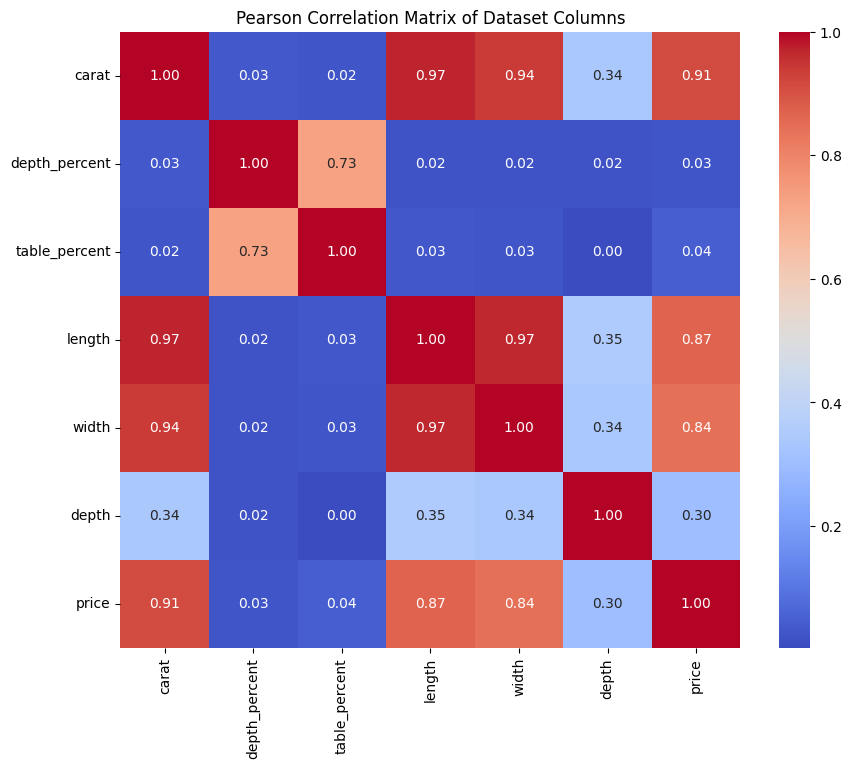

carat            0.913479
length           0.869521
width            0.841887
depth            0.299696
table_percent    0.042453
depth_percent    0.025469
Name: price, dtype: float64

In [ ]:
import seaborn as sns
corr_matrix = diamonds.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pearson Correlation Matrix of Dataset Columns')
plt.show()

target_variable = 'price'  # Assuming 'price' is the target variable
correlation_with_target = corr_matrix[target_variable].drop(target_variable).abs().sort_values(ascending=False)

correlation_with_target

1. Carat with a correlation of 0.913479: This indicates that as the carat size increases, the price of the diamond tends to increase as well.
2. Length with a correlation of 0.869521: Similarly,this indicates that larger diamonds (length) are generally more expensive.
3. W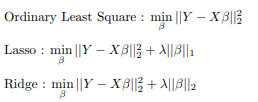idth with a correlation of 0.841887: This also shows a strong positive correlation, supporting the idea that larger diamonds ( width) have higher prices.
4. Depth, depth_percent, and table_pecent with a correlation which way much lower compare to the pervious three factors.

# Q1.2

Index(['color', 'clarity', 'carat', 'cut', 'symmetry', 'polish',
       'depth_percent', 'table_percent', 'length', 'width', 'depth',
       'girdle_min', 'girdle_max', 'price'],
      dtype='object')


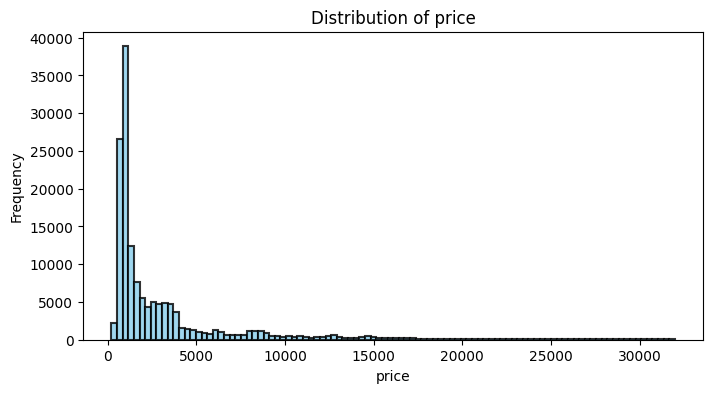

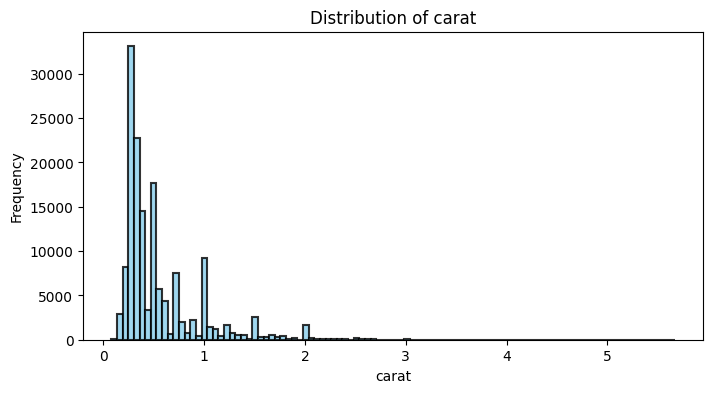

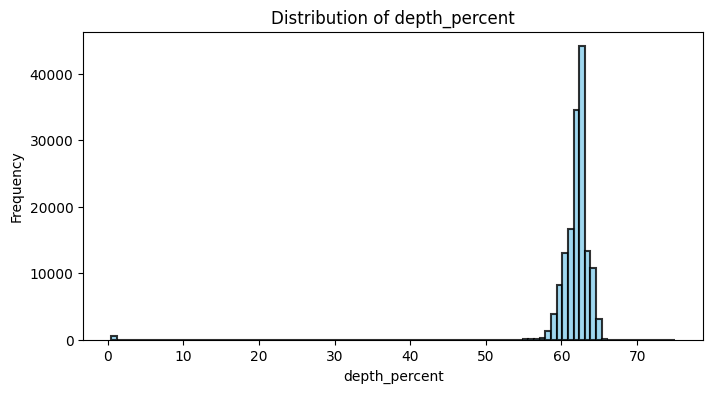

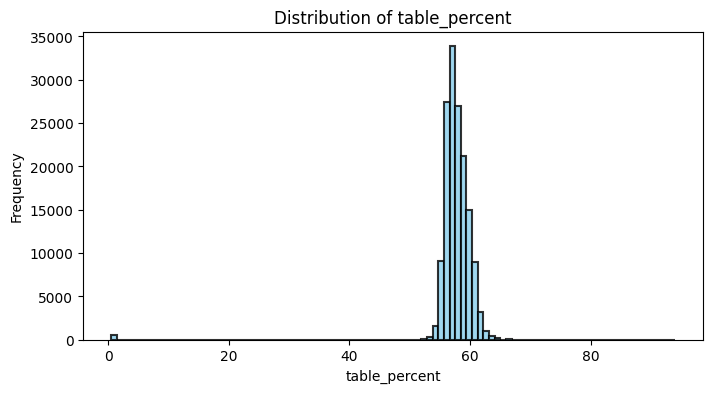

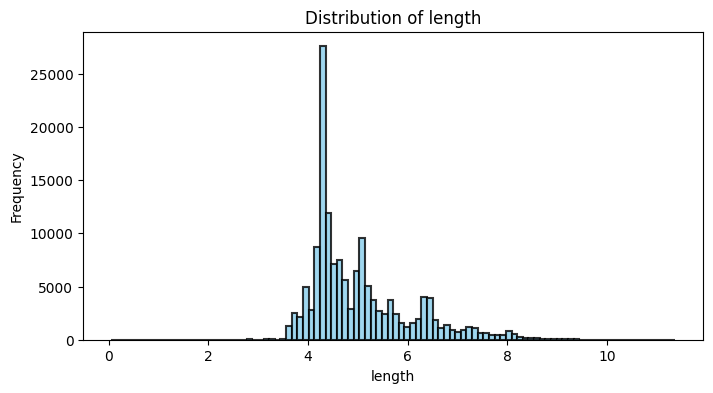

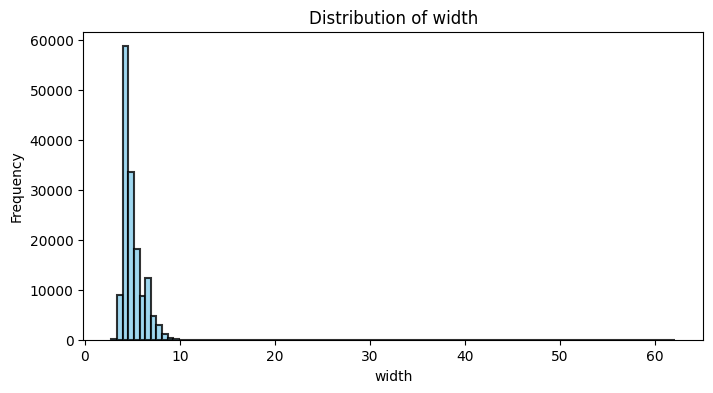

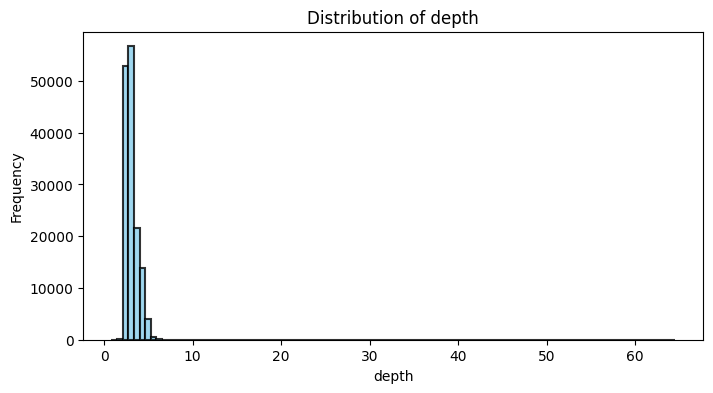

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

print(diamonds.columns)
numerical_features = ['price','carat','depth_percent','table_percent','length','width','depth']


for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    plt.hist(diamonds[feature], bins=100, edgecolor='k', color='skyblue', linewidth=1.5, alpha=0.8)
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {feature}')
    plt.show()



Log Transformation, Square Root Transformation can be done if the
distribution of a feature has high skewness. The plots Below show the original and log-transformed distributions of the 'carat' feature.

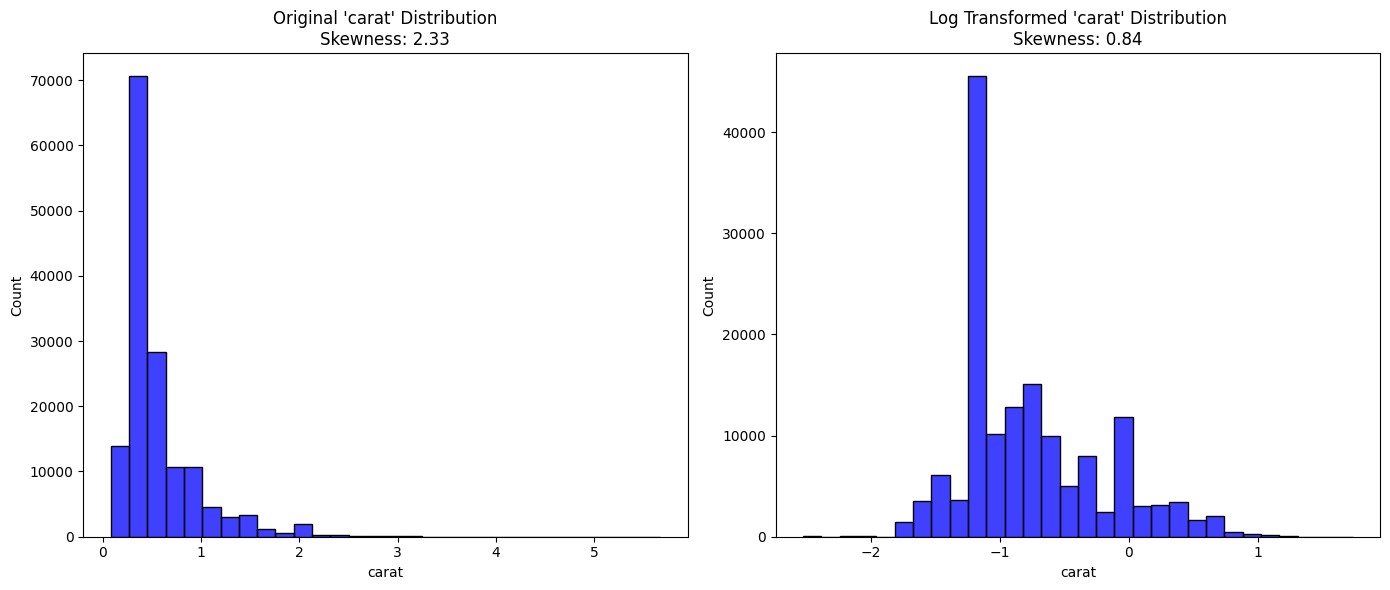

In [ ]:
original_skewness = diamonds['carat'].skew()

carat_log_transformed = np.log(diamonds['carat'])

transformed_skewness = carat_log_transformed.skew()

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.histplot(diamonds['carat'], bins=30, ax=ax[0], color='blue', edgecolor='black')
ax[0].set_title(f"Original 'carat' Distribution\nSkewness: {original_skewness:.2f}")

sns.histplot(carat_log_transformed, bins=30, ax=ax[1], color='blue', edgecolor='black')
ax[1].set_title(f"Log Transformed 'carat' Distribution\nSkewness: {transformed_skewness:.2f}")

plt.tight_layout()
plt.show()

# Q1.3

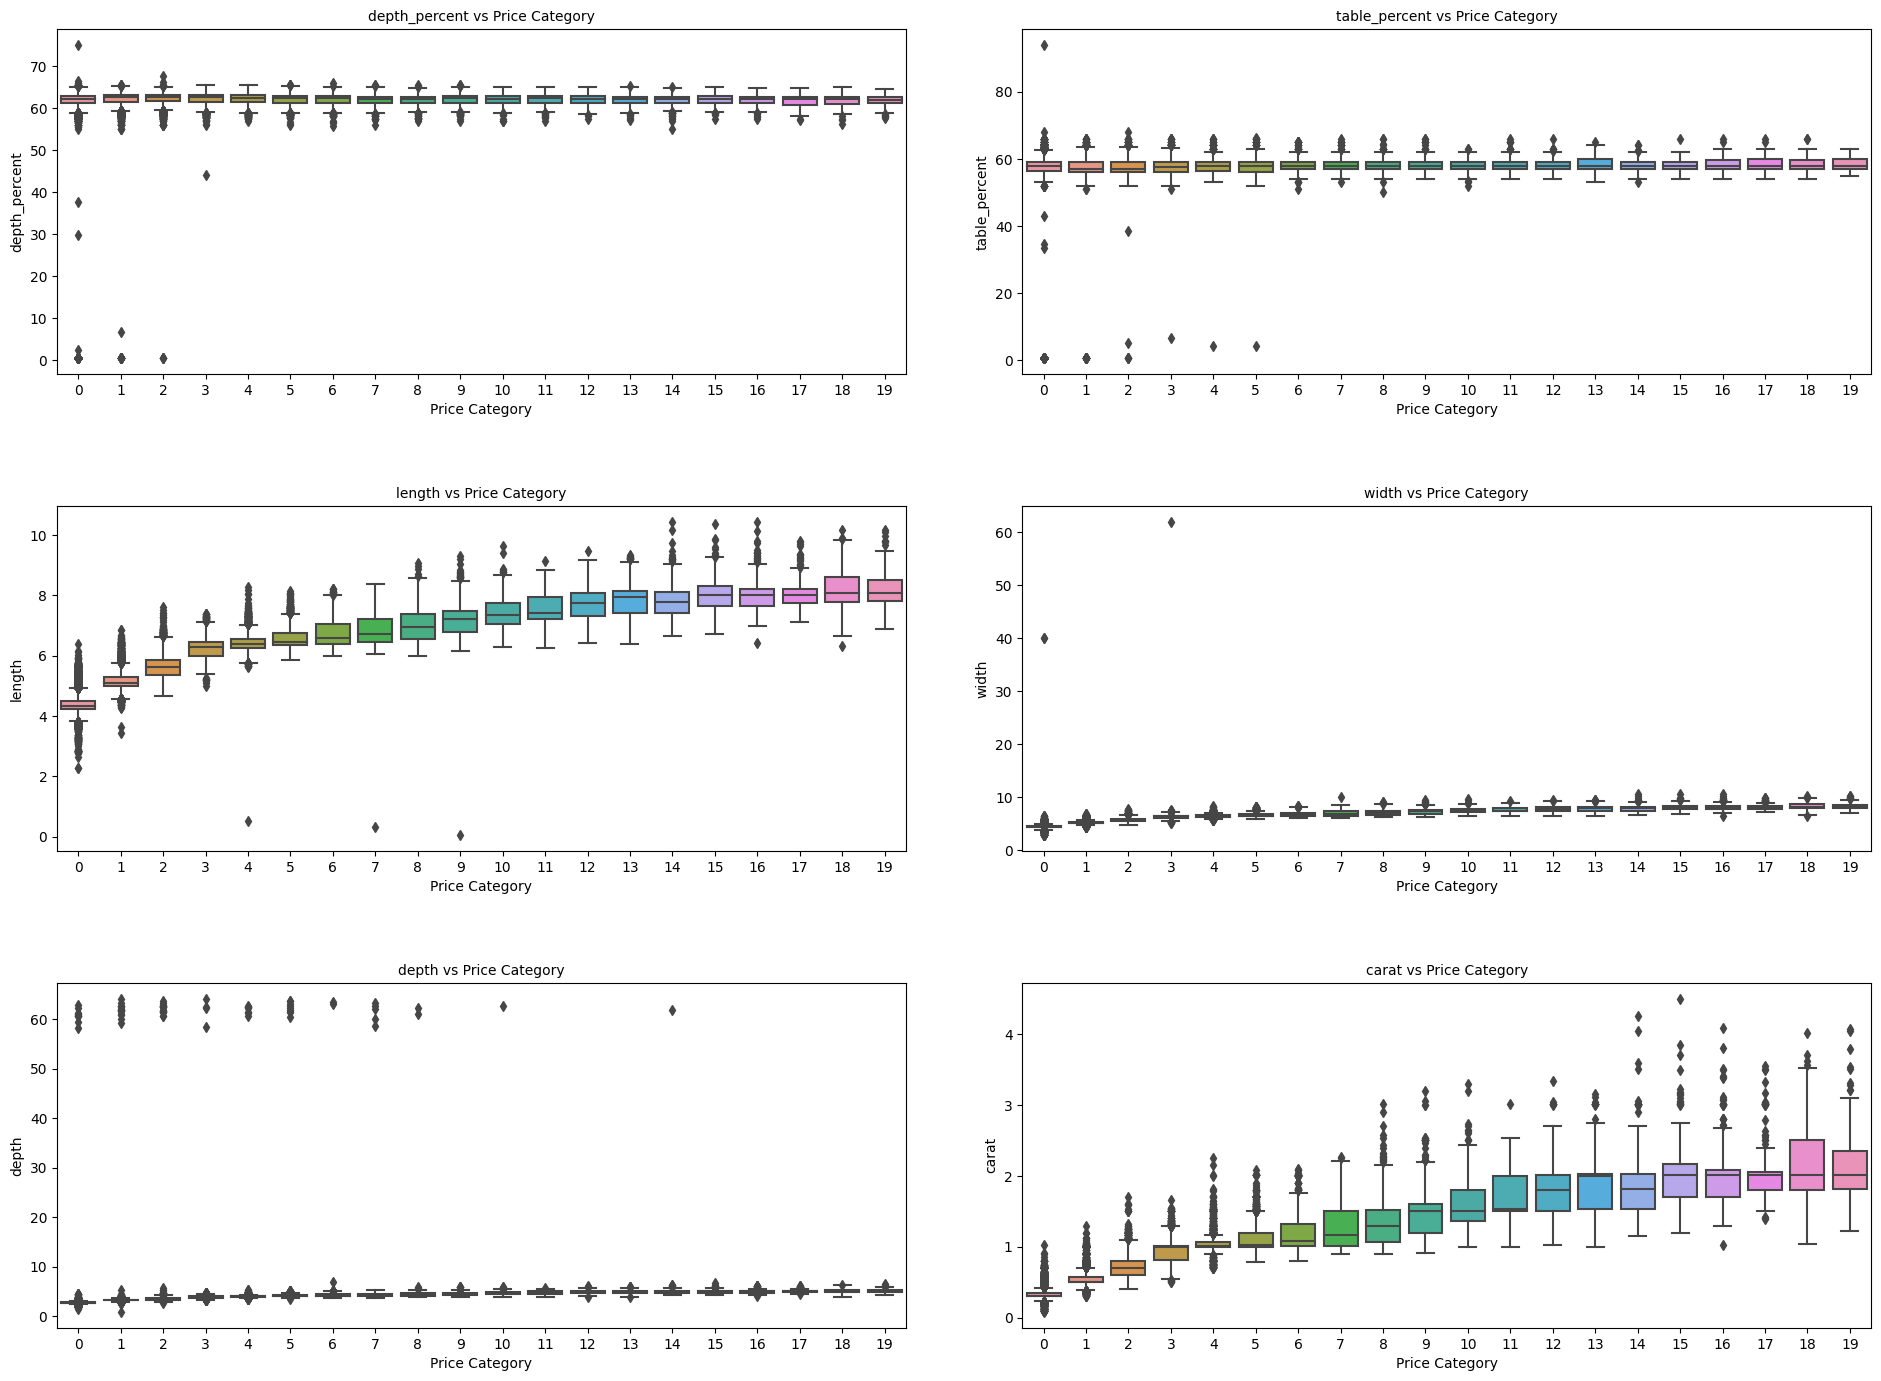

In [ ]:
diamonds_sample = diamonds.sample(frac=0.5, random_state=1)

diamonds_sample['price_category'] = pd.cut(diamonds_sample['price'], bins=20, labels=range(20))

selected_features = ['depth_percent', 'table_percent', 'length', 'width', 'depth','carat']

plt.figure(figsize=(20, 15))
for index, feature in enumerate(selected_features, 1):
    plt.subplot(3, 2, index)
    sns.boxplot(x='price_category', y=feature, data=diamonds_sample)
    plt.title(f'{feature} vs Price Category', fontsize=10)
    plt.xlabel('Price Category', fontsize=10)
    plt.ylabel(feature, fontsize=10)

plt.tight_layout(pad=5.0)
plt.show()


'length', 'width', and 'depth' might generally increase with higher price categories, reflecting that larger diamonds tend to be more expensive.  diamond's 'carat' significantly affects its price

# Q1.4

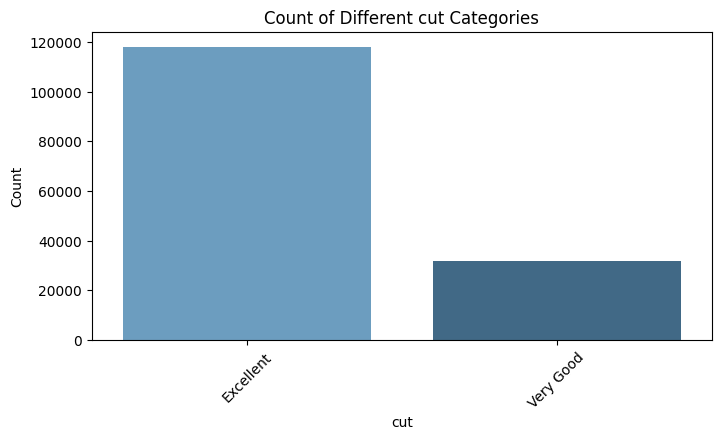

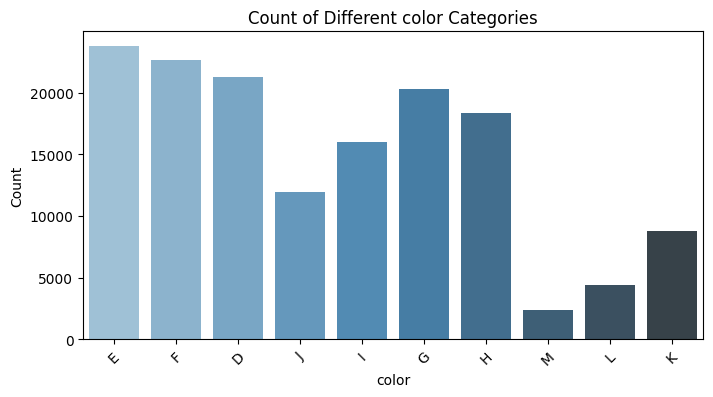

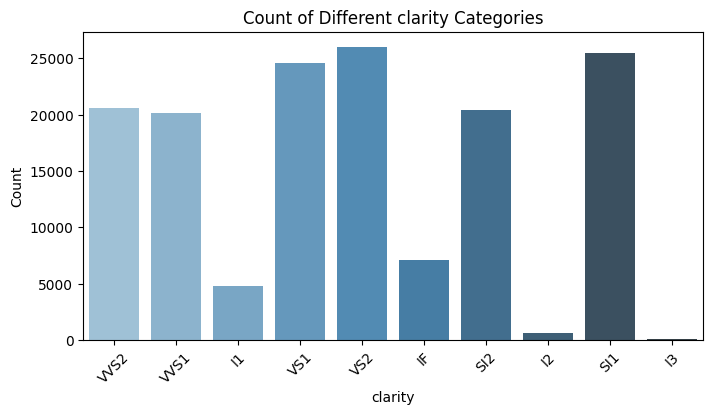

In [ ]:
categorical_features = ['cut', 'color', 'clarity']
for feature in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=diamonds, x=feature, palette='Blues_d')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(f'Count of Different {feature} Categories')
    plt.xticks(rotation=45)  # Rotate labels to prevent overlap
    plt.show()

In [ ]:
redwine = '/content/drive/Shareddrives/ECE219/Project4/winequality/winequality-red.csv'  # Example path to the red wine data
whitewine = '/content/drive/Shareddrives/ECE219/Project4/winequality/winequality-white.csv'  # Example path to the white wine data

In [ ]:
dataset1 = pd.read_csv(redwine, delimiter=';')
dataset1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


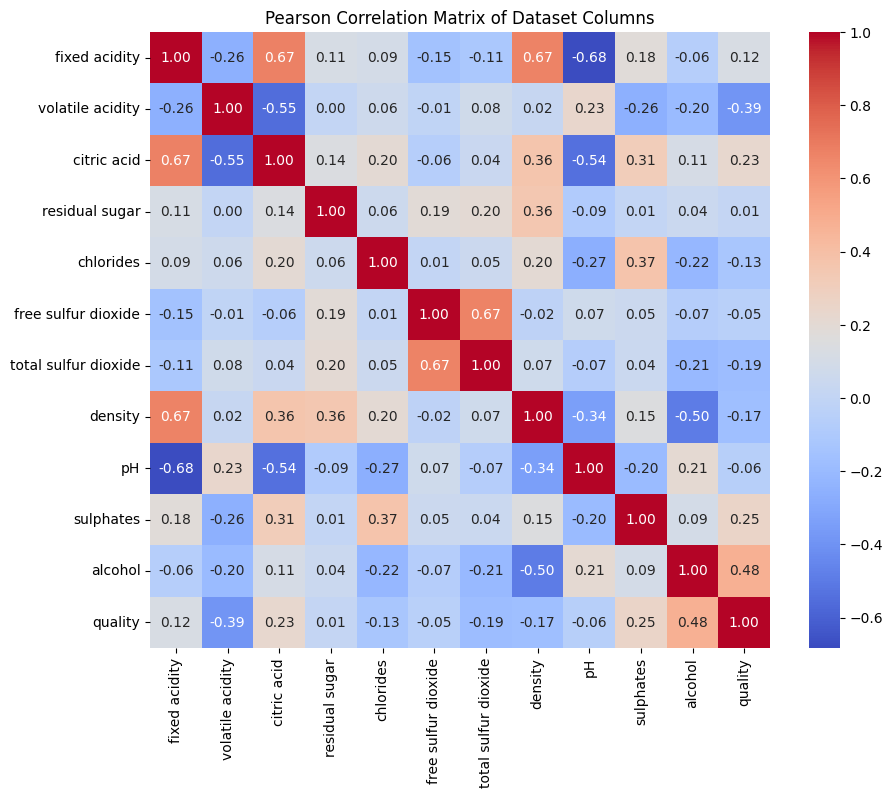

alcohol                 0.476166
volatile acidity        0.390558
sulphates               0.251397
citric acid             0.226373
total sulfur dioxide    0.185100
density                 0.174919
chlorides               0.128907
fixed acidity           0.124052
pH                      0.057731
free sulfur dioxide     0.050656
residual sugar          0.013732
Name: quality, dtype: float64

In [ ]:
import seaborn as sns
corr_matrix = dataset1.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pearson Correlation Matrix of Dataset Columns')
plt.show()

# Identify features with the highest absolute correlation with the target variable
target_variable = 'quality'  # Assuming 'quality' is the target variable
correlation_with_target = corr_matrix[target_variable].drop(target_variable).abs().sort_values(ascending=False)

correlation_with_target

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


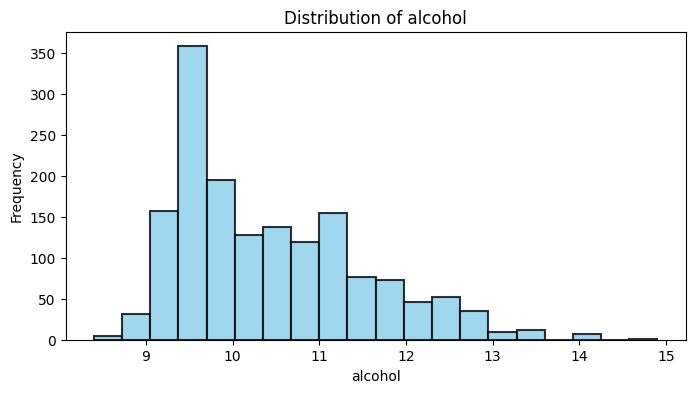

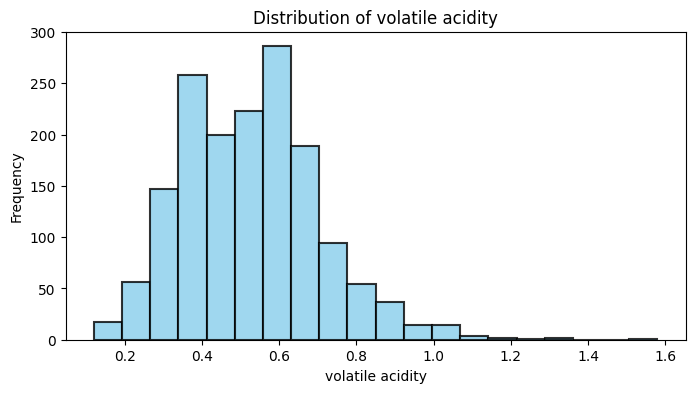

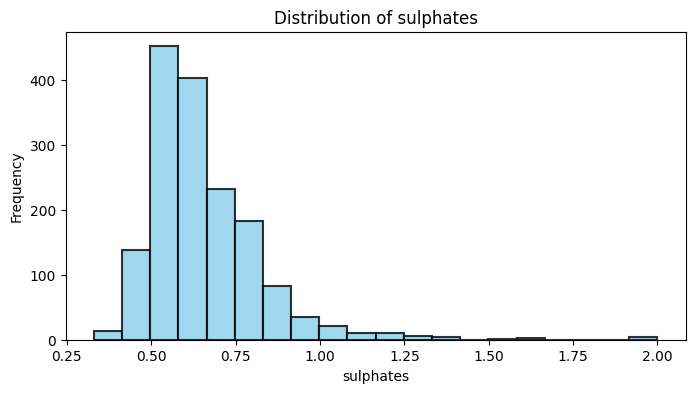

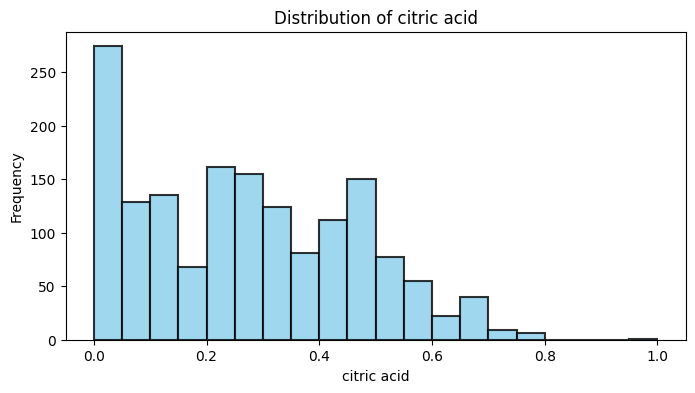

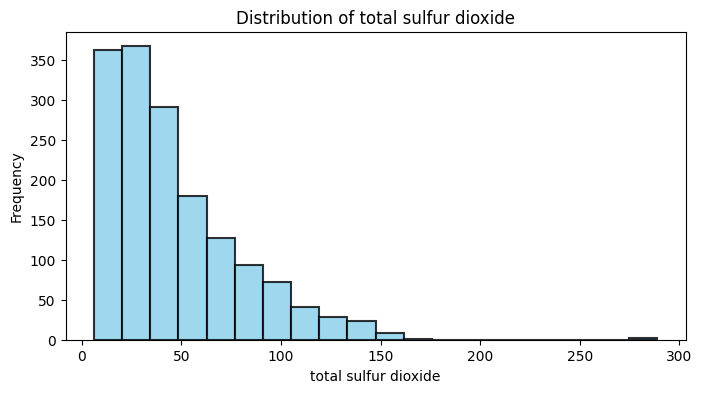

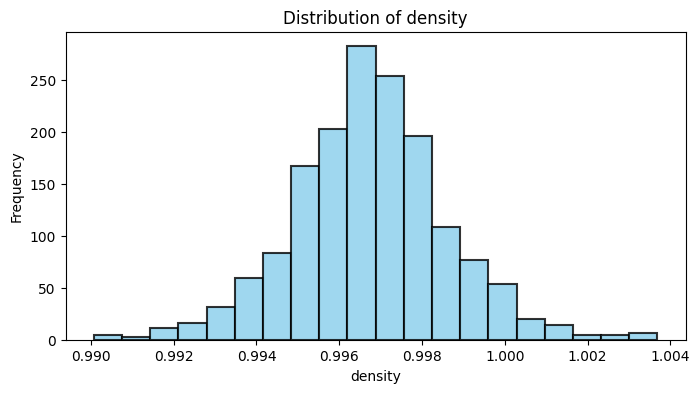

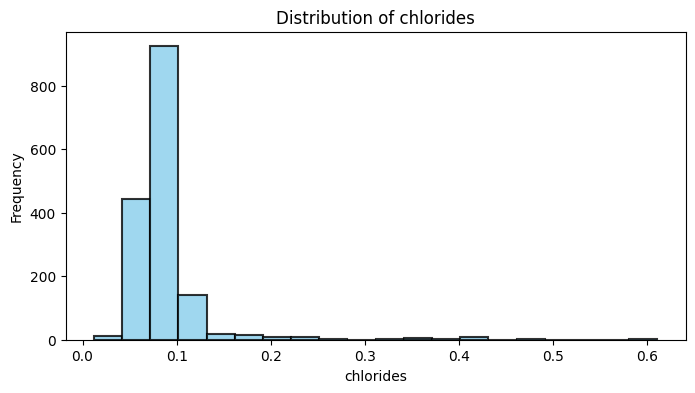

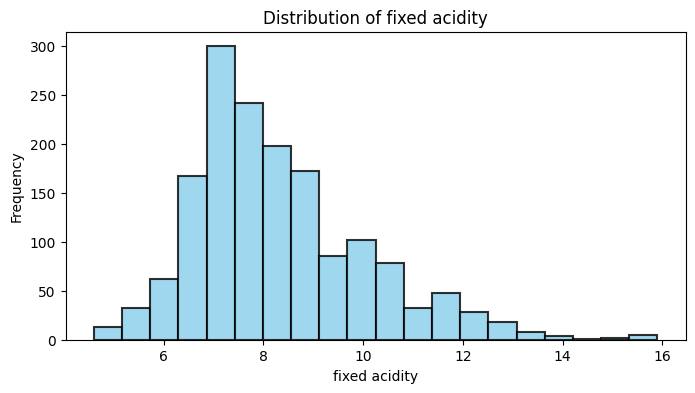

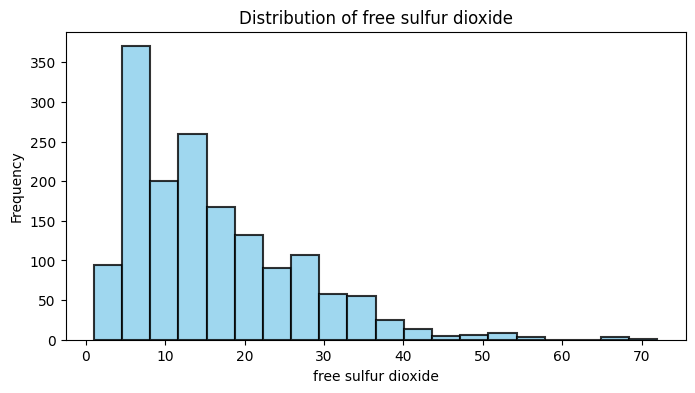

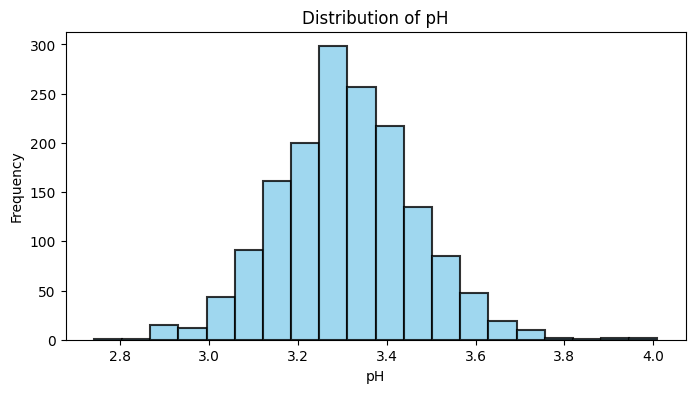

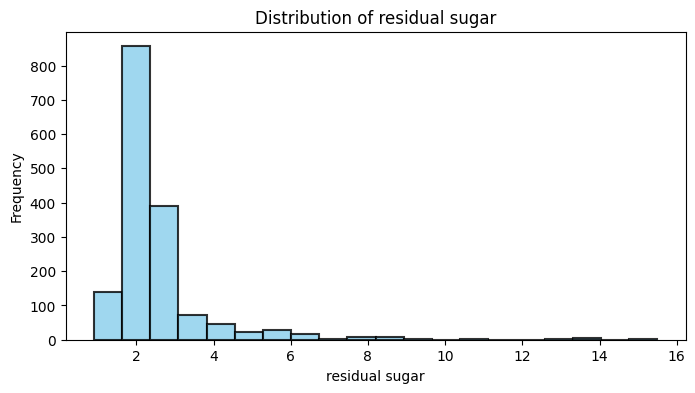

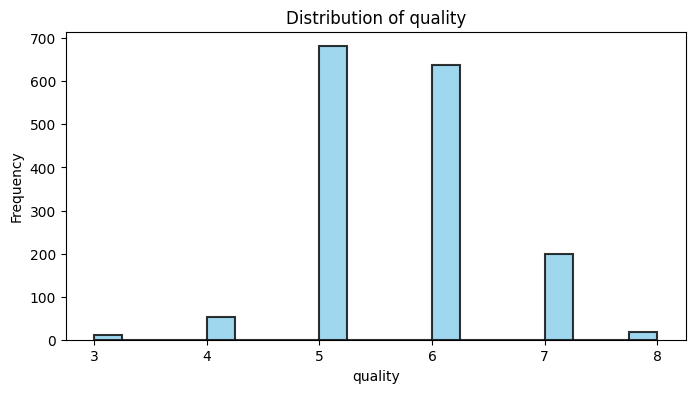

In [ ]:
print(dataset1.columns)
numerical_features = ['alcohol' , 'volatile acidity' ,'sulphates','citric acid' ,'total sulfur dioxide', 'density', 'chlorides'  ,'fixed acidity' , 'free sulfur dioxide' ,'pH'  ,'residual sugar', 'quality' ]

# Plot histograms for numerical features
for feature in numerical_features:
    plt.figure(figsize=(8, 4))  # Adjust the figure size as necessary
    plt.hist(dataset1[feature], bins=20, edgecolor='k', color='skyblue', linewidth=1.5, alpha=0.8)
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {feature}')
    plt.show()



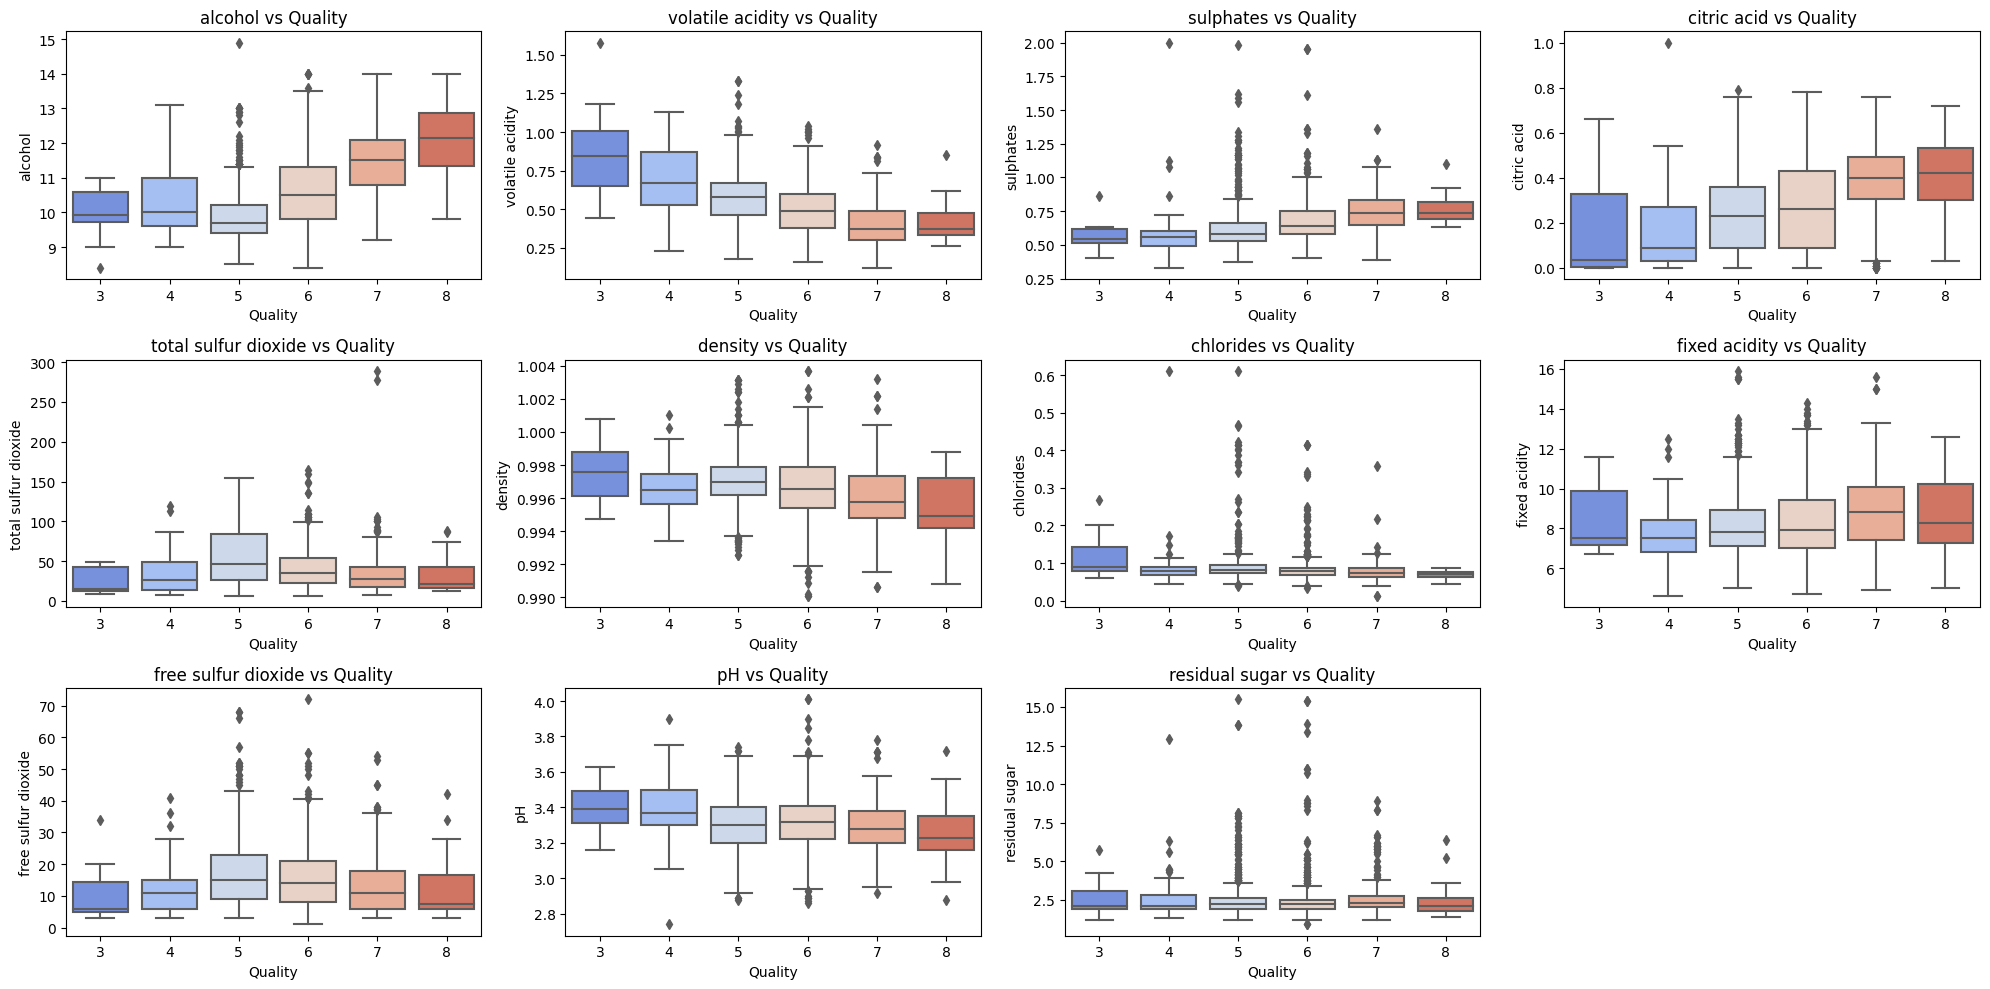

In [ ]:
selected_features = ['alcohol' , 'volatile acidity' ,'sulphates','citric acid' ,'total sulfur dioxide', 'density', 'chlorides'  ,'fixed acidity' , 'free sulfur dioxide' ,'pH'  ,'residual sugar']

# Plotting box plots for selected features against 'quality'
plt.figure(figsize=(20, 10))

for index, feature in enumerate(selected_features, 1):
    plt.subplot(3, 4, index)
    sns.boxplot(x='quality', y=feature, data=dataset1, palette='coolwarm')
    plt.title(f'{feature} vs Quality')
    plt.xlabel('Quality')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()


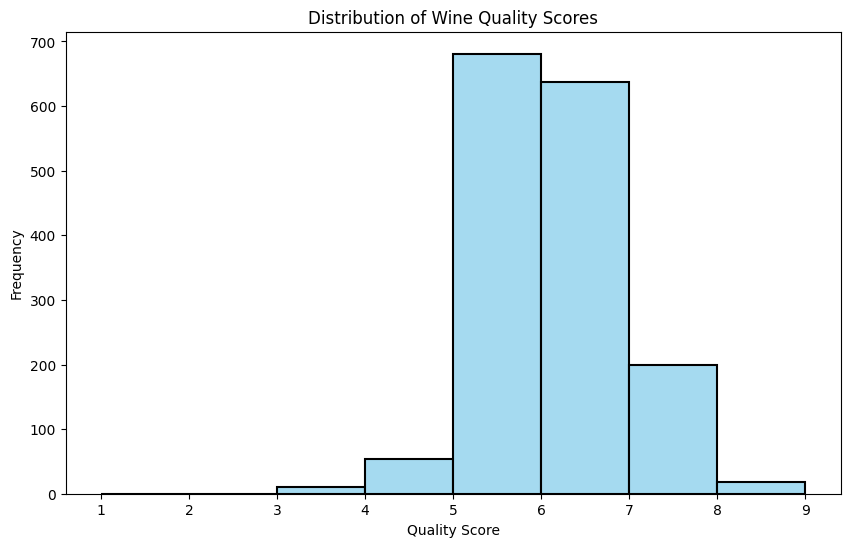

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(dataset1['quality'], kde=False, color='skyblue', bins=range(1, 10), edgecolor='k', linewidth=1.5)
plt.title('Distribution of Wine Quality Scores')
plt.xlabel('Quality Score')
plt.ylabel('Frequency')
plt.xticks(range(1, 10))  # Setting x-axis ticks to show each quality score
plt.show()

In [ ]:
dataset2 = pd.read_csv(whitewine, delimiter=';')
dataset2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


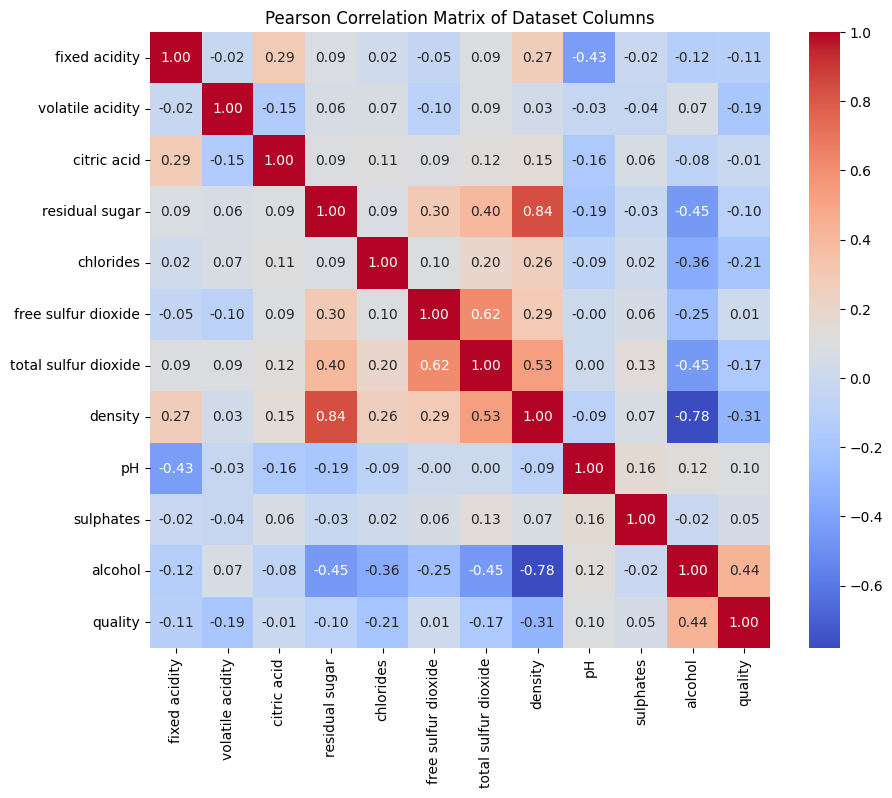

alcohol                 0.435575
density                 0.307123
chlorides               0.209934
volatile acidity        0.194723
total sulfur dioxide    0.174737
fixed acidity           0.113663
pH                      0.099427
residual sugar          0.097577
sulphates               0.053678
citric acid             0.009209
free sulfur dioxide     0.008158
Name: quality, dtype: float64

In [ ]:
import seaborn as sns
corr_matrix = dataset2.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pearson Correlation Matrix of Dataset Columns')
plt.show()

# Identify features with the highest absolute correlation with the target variable
target_variable = 'quality'  # Assuming 'quality' is the target variable
correlation_with_target = corr_matrix[target_variable].drop(target_variable).abs().sort_values(ascending=False)

correlation_with_target

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


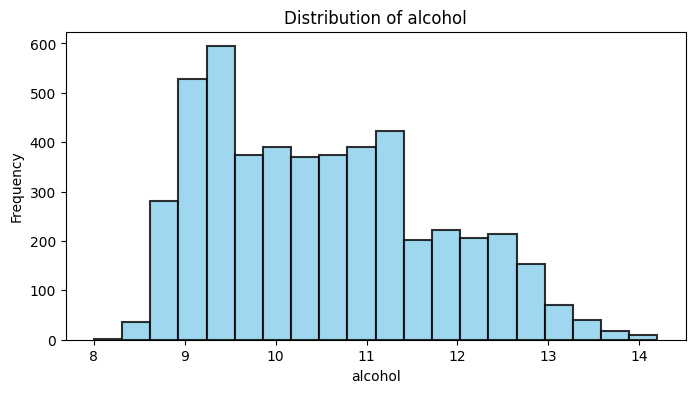

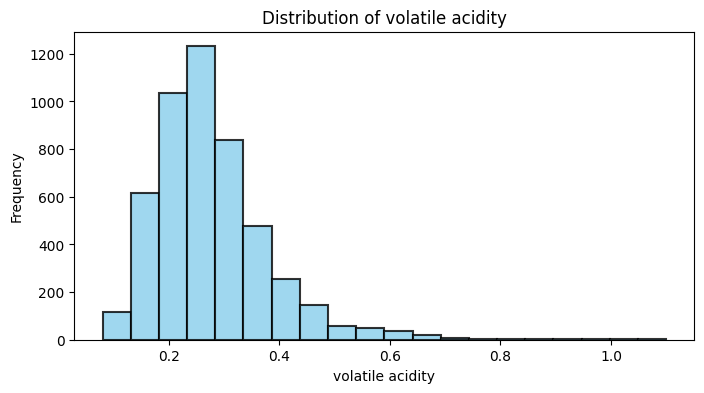

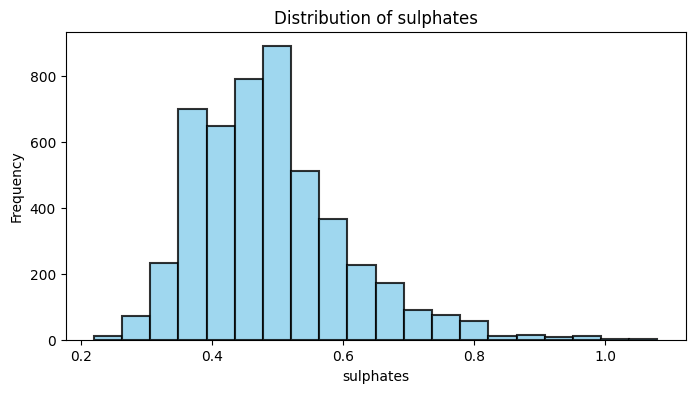

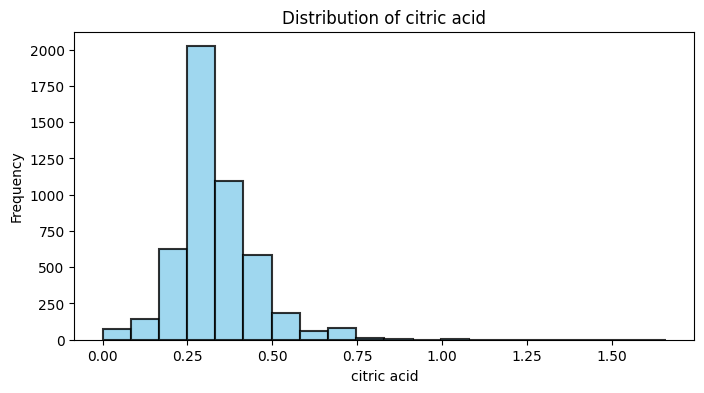

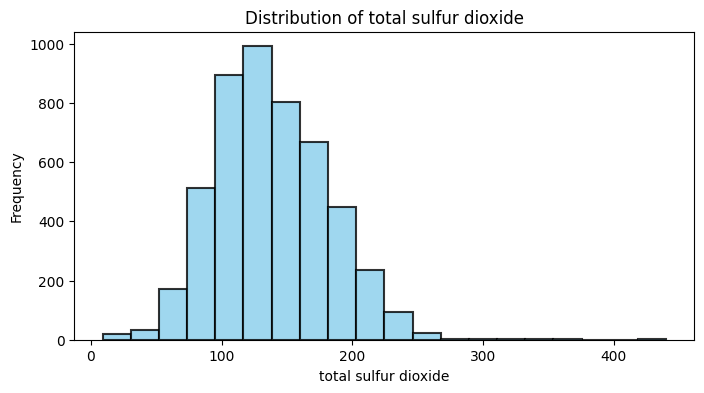

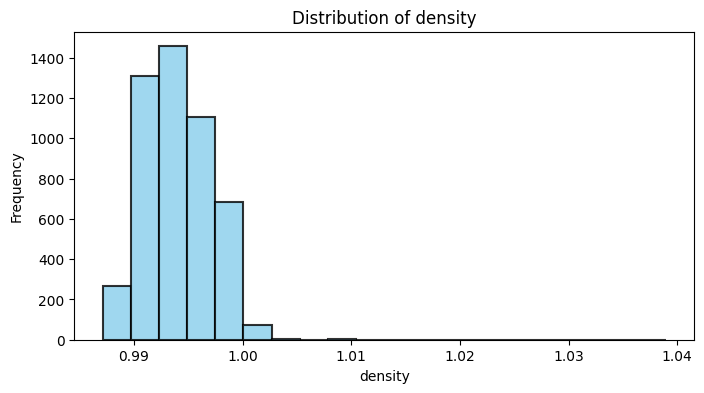

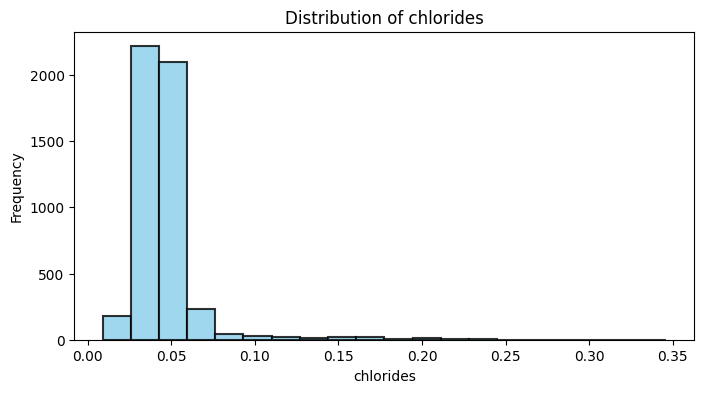

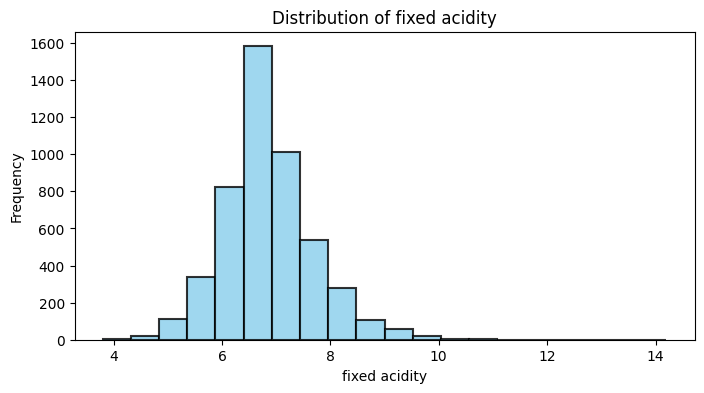

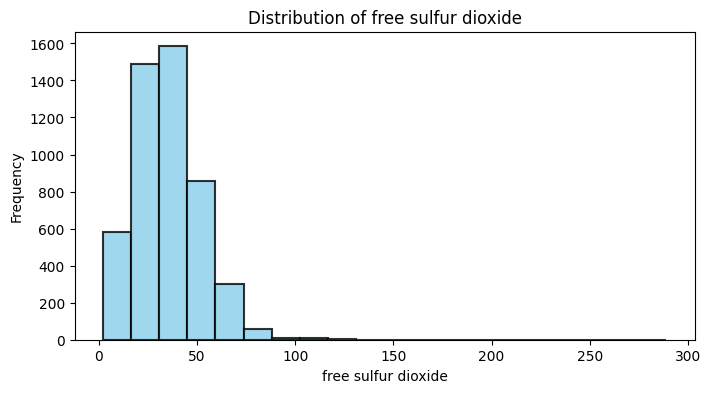

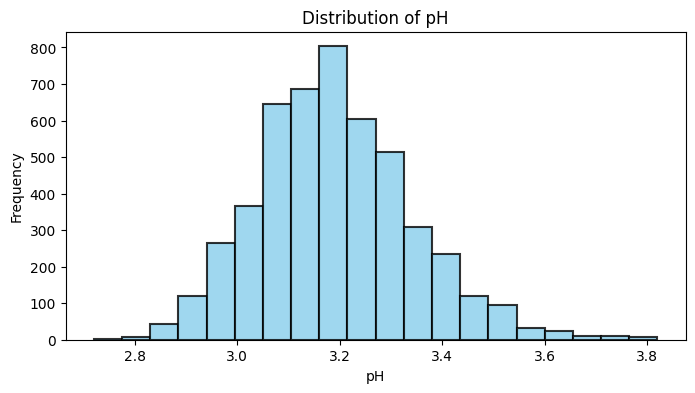

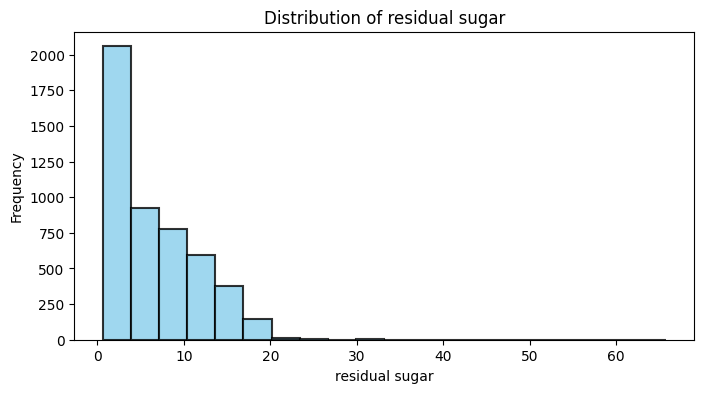

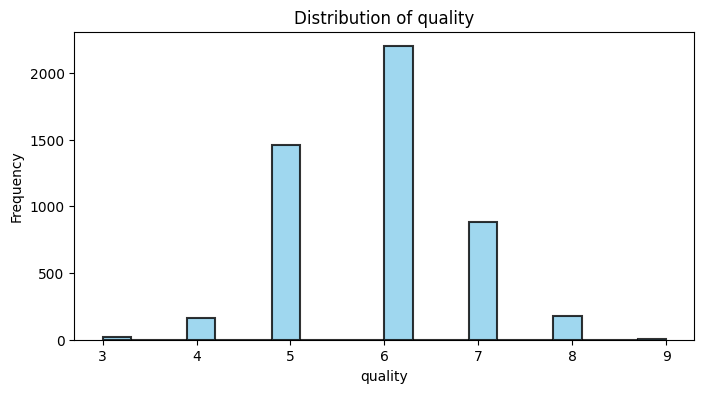

In [ ]:
print(dataset2.columns)
numerical_features = ['alcohol' , 'volatile acidity' ,'sulphates','citric acid' ,'total sulfur dioxide', 'density', 'chlorides'  ,'fixed acidity' , 'free sulfur dioxide' ,'pH'  ,'residual sugar', 'quality' ]

# Plot histograms for numerical features
for feature in numerical_features:
    plt.figure(figsize=(8, 4))  # Adjust the figure size as necessary
    plt.hist(dataset2[feature], bins=20, edgecolor='k', color='skyblue', linewidth=1.5, alpha=0.8)
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {feature}')
    plt.show()


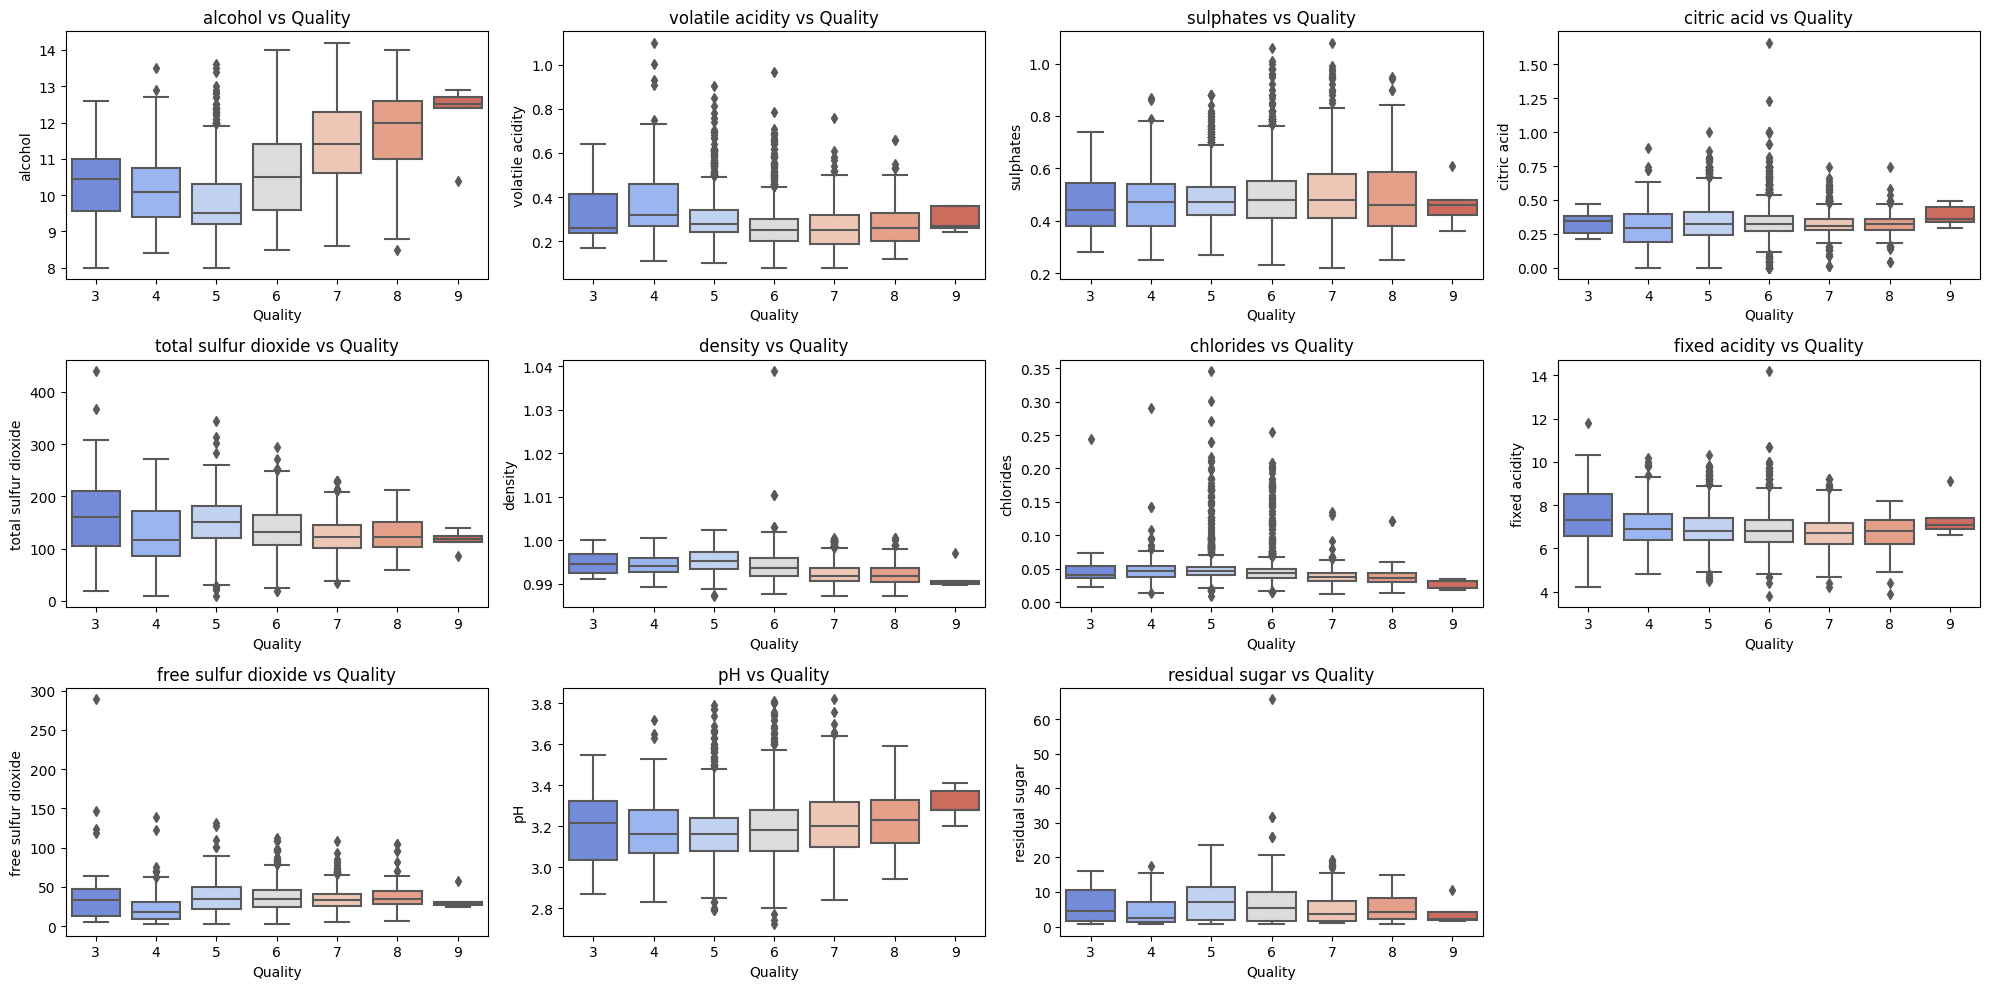

In [ ]:
selected_features = ['alcohol' , 'volatile acidity' ,'sulphates','citric acid' ,'total sulfur dioxide', 'density', 'chlorides'  ,'fixed acidity' , 'free sulfur dioxide' ,'pH'  ,'residual sugar']

# Plotting box plots for selected features against 'quality'
plt.figure(figsize=(20, 10))

for index, feature in enumerate(selected_features, 1):
    plt.subplot(3, 4, index)
    sns.boxplot(x='quality', y=feature, data=dataset2, palette='coolwarm')
    plt.title(f'{feature} vs Quality')
    plt.xlabel('Quality')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

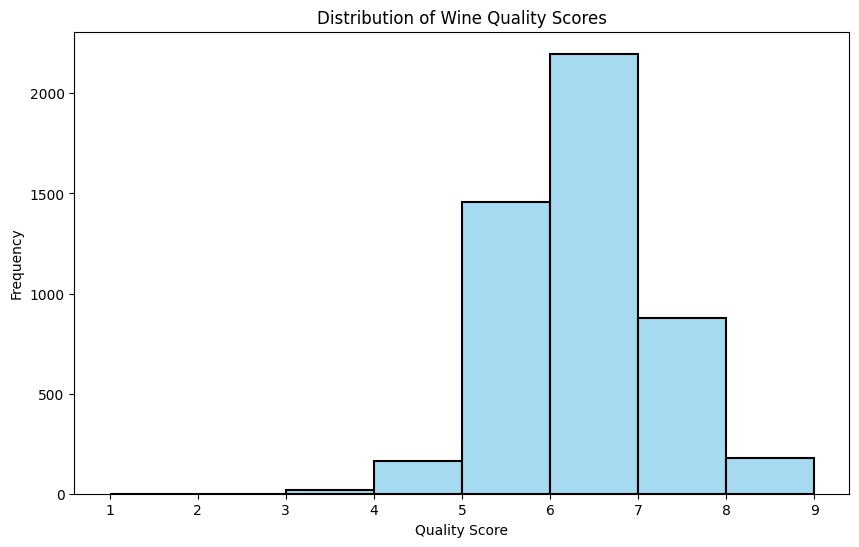

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(dataset2['quality'], kde=False, color='skyblue', bins=range(1, 10), edgecolor='k', linewidth=1.5)
plt.title('Distribution of Wine Quality Scores')
plt.xlabel('Quality Score')
plt.ylabel('Frequency')
plt.xticks(range(1, 10))  # Setting x-axis ticks to show each quality score
plt.show()

# Q2.1 Encoding for the Diamonds Dataset and Standardization

In [ ]:
dataset_d = diamonds.copy(deep=True)

In [ ]:
dataset_d.head()

,color,clarity,carat,cut,symmetry,polish,depth_percent,table_percent,length,width,depth,girdle_min,girdle_max,price
0,E,VVS2,0.09,Excellent,Very Good,Very Good,62.7,59.0,2.85,2.87,1.79,M,M,200
1,E,VVS2,0.09,Very Good,Very Good,Very Good,61.9,59.0,2.84,2.89,1.78,STK,STK,200
2,E,VVS2,0.09,Excellent,Very Good,Very Good,61.1,59.0,2.88,2.90,1.77,TN,M,200
3,E,VVS2,0.09,Excellent,Very Good,Very Good,62.0,59.0,2.86,2.88,1.78,M,STK,200
4,E,VVS2,0.09,Very Good,Very Good,Excellent,64.9,58.5,2.79,2.83,1.82,STK,STK,200


In [ ]:

color_dict = {'M': 1, 'L': 2, 'K': 3, 'J': 4, 'I': 5, 'H': 6, 'G': 7, 'F': 8, 'E': 9, 'D': 10}
cut_dict = {'Very Good': 1, 'Excellent': 2}
symmetry_dict = {'Very Good': 1, 'Excellent': 2}
polish_dict = {'Very Good': 1, 'Excellent': 2}
girdle_min_dict = {'unknown': 1, 'XTK': 2, 'VTK': 3, 'TK': 4, 'STK': 5, 'M': 6, 'STN': 7, 'TN': 8, 'VTN': 9, 'XTN': 10}
girdle_max_dict = {'XTN': 1, 'VTN': 2, 'TN': 3, 'STN': 4, 'M': 5, 'STK': 6, 'TK': 7, 'VTK': 8, 'XTK': 9, 'unknown': 10}
clarity_dict = {'I3': 1, 'I2': 2, 'I1': 3, 'SI2': 4, 'SI1': 5, 'VS2': 6, 'VS1': 7, 'VVS2': 8, 'VVS1': 9, 'IF': 10}


In [ ]:

dataset_d['cut_encoded'] = dataset_d.cut.map(cut_dict)
dataset_d['color_encoded'] = dataset_d.color.map(color_dict)
dataset_d['clarity_encoded'] = dataset_d.clarity.map(clarity_dict)
dataset_d['symmetry_encoded'] = dataset_d.symmetry.map(symmetry_dict)
dataset_d['polish_encoded'] = dataset_d.polish.map(polish_dict)
dataset_d['girdle_min_encoded'] = dataset_d.girdle_min.map(girdle_min_dict)
dataset_d['girdle_max_encoded'] = dataset_d.girdle_max.map(girdle_max_dict)

In [ ]:
dataset_d.head()

,color,clarity,carat,cut,symmetry,polish,depth_percent,table_percent,length,width,...,girdle_min,girdle_max,price,cut_encoded,color_encoded,clarity_encoded,symmetry_encoded,polish_encoded,girdle_min_encoded,girdle_max_encoded
0,E,VVS2,0.09,Excellent,Very Good,Very Good,62.7,59.0,2.85,2.87,...,M,M,200,2,9,8,1,1,6,5
1,E,VVS2,0.09,Very Good,Very Good,Very Good,61.9,59.0,2.84,2.89,...,STK,STK,200,1,9,8,1,1,5,6
2,E,VVS2,0.09,Excellent,Very Good,Very Good,61.1,59.0,2.88,2.90,...,TN,M,200,2,9,8,1,1,8,5
3,E,VVS2,0.09,Excellent,Very Good,Very Good,62.0,59.0,2.86,2.88,...,M,STK,200,2,9,8,1,1,6,6
4,E,VVS2,0.09,Very Good,Very Good,Excellent,64.9,58.5,2.79,2.83,...,STK,STK,200,1,9,8,1,2,5,6


In [ ]:
dataset_encoded = dataset_d.drop(columns=['cut','color','clarity','symmetry','polish','girdle_min','girdle_max'])

In [ ]:
dataset_encoded.head()

,carat,depth_percent,table_percent,length,width,depth,price,cut_encoded,color_encoded,clarity_encoded,symmetry_encoded,polish_encoded,girdle_min_encoded,girdle_max_encoded
0,0.09,62.7,59.0,2.85,2.87,1.79,200,2,9,8,1,1,6,5
1,0.09,61.9,59.0,2.84,2.89,1.78,200,1,9,8,1,1,5,6
2,0.09,61.1,59.0,2.88,2.90,1.77,200,2,9,8,1,1,8,5
3,0.09,62.0,59.0,2.86,2.88,1.78,200,2,9,8,1,1,6,6
4,0.09,64.9,58.5,2.79,2.83,1.82,200,1,9,8,1,2,5,6


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_regression, f_regression, SelectKBest

numerical_cols = ['carat', 'depth_percent', 'table_percent', 'length', 'width', 'depth',
                  'cut_encoded', 'color_encoded', 'clarity_encoded', 'symmetry_encoded', 'polish_encoded',
                  'girdle_min_encoded', 'girdle_max_encoded', 'price']

numerical_data = dataset_encoded[numerical_cols]

scaler = StandardScaler()
standardized_data = scaler.fit_transform(numerical_data)

standardized_df = pd.DataFrame(standardized_data, columns=numerical_cols)

# Display the first few rows of the standardized data
standardized_df.head()

,carat,depth_percent,table_percent,length,width,depth,cut_encoded,color_encoded,clarity_encoded,symmetry_encoded,polish_encoded,girdle_min_encoded,girdle_max_encoded,price
0,-1.157106,0.215866,0.345119,-2.146391,-2.078247,-0.730430,0.518390,0.916097,0.811981,-1.746964,-2.522184,0.663841,-1.191356,-0.659094
1,-1.157106,0.014689,0.345119,-2.156289,-2.059209,-0.735681,-1.929051,0.916097,0.811981,-1.746964,-2.522184,0.271002,-0.692649,-0.659094
2,-1.157106,-0.186488,0.345119,-2.116697,-2.049690,-0.740932,0.518390,0.916097,0.811981,-1.746964,-2.522184,1.449520,-1.191356,-0.659094
3,-1.157106,0.039836,0.345119,-2.136493,-2.068728,-0.735681,0.518390,0.916097,0.811981,-1.746964,-2.522184,0.663841,-0.692649,-0.659094
4,-1.157106,0.769101,0.218693,-2.205778,-2.116324,-0.714676,-1.929051,0.916097,0.811981,-1.746964,0.396482,0.271002,-0.692649,-0.659094


# Question2.2 Feature Selection

In [ ]:
X = standardized_df[numerical_cols[:-1]]  # Exclude 'price' as it's the target
y = standardized_df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Compute Mutual Information (MI) scores and select features
mi_scores = mutual_info_regression(X_train, y_train)
selector_mi = SelectKBest(mutual_info_regression, k='all').fit(X_train, y_train)
X_train_mi = selector_mi.transform(X_train)
X_test_mi = selector_mi.transform(X_test)
mi_results = pd.Series(mi_scores, index=X.columns, name="MI Scores").sort_values(ascending=False)

# Compute F-scores and p-values
f_scores, p_values = f_regression(X_train, y_train)
f_results = pd.DataFrame({'F Score': f_scores, 'P Value': p_values}, index=X.columns).sort_values(by="F Score", ascending=False)

# Select the top features based on F-scores
selector_f = SelectKBest(f_regression, k='all').fit(X_train, y_train)
X_train_f = selector_f.transform(X_train)
X_test_f = selector_f.transform(X_test)

# Optional: Display the results for analysis
print(mi_results)
print(f_results)



carat                 1.359443
width                 1.194142
length                1.185590
depth                 1.151173
color_encoded         0.174678
clarity_encoded       0.168540
depth_percent         0.043066
girdle_max_encoded    0.031447
cut_encoded           0.028569
symmetry_encoded      0.026849
girdle_min_encoded    0.022778
table_percent         0.022381
polish_encoded        0.007992
Name: MI Scores, dtype: float64
                          F Score       P Value
carat               605098.277047  0.000000e+00
length              371591.167281  0.000000e+00
width               300175.172484  0.000000e+00
depth                12198.889530  0.000000e+00
polish_encoded         369.416567  3.335977e-82
symmetry_encoded       279.562155  1.101999e-62
color_encoded          274.140524  1.663312e-61
table_percent          213.858280  2.177148e-48
clarity_encoded         89.768288  2.723880e-21
depth_percent           74.800842  5.269460e-18
cut_encoded             72.250572  1.

In [ ]:

lowest_mi_features = mi_results.nsmallest(2).index.tolist()
lowest_mi_features
mi_results = pd.Series(mi_scores, index=X_train.columns).sort_values()
lowest_mi_scores = mi_results.nsmallest(2)
print(lowest_mi_scores)


polish_encoded    0.007992
table_percent     0.022381
dtype: float64


By selecting features with higer mutual information or significant F-scores, we effectively reduce the noise in the model. This can lead to lower test RMSE as the model makes predictions based on more relevant information. By using a subset of features, the complexity of the model can be reduced. This not only speeds up the training process but can also lead to more interpretable models. The qualitative impact of feature selection using mutual information and F-scores on test RMSE is generally positive, particularly for models where feature relevance and linear relationships are crucial.

# 3 Linear Regression for Diamonds


In [ ]:
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.feature_selection import SelectKBest, mutual_info_regression, f_regression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "LinearRegression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge()
}

results = {
    "LinearRegression": {"MI": [], "F": []},
    "Lasso": {"MI": [], "F": []},
    "Ridge": {"MI": [], "F": []}
}

for i in range(1, X_train.shape[1] + 1):
    print(f'Testing models with top {i} features')

    selector_mi = SelectKBest(score_func=mutual_info_regression, k=i)
    X_train_mi = selector_mi.fit_transform(X_train, y_train)
    X_test_mi = selector_mi.transform(X_test)

    selector_f = SelectKBest(score_func=f_regression, k=i)
    X_train_f = selector_f.fit_transform(X_train, y_train)
    X_test_f = selector_f.transform(X_test)

    for name, model in models.items():
        cv_results_mi = cross_validate(model, X_train_mi, y_train, scoring='neg_root_mean_squared_error', cv=10, n_jobs=-1)
        mean_rmse_mi = -cv_results_mi['test_score'].mean()

        cv_results_f = cross_validate(model, X_train_f, y_train, scoring='neg_root_mean_squared_error', cv=10, n_jobs=-1)
        mean_rmse_f = -cv_results_f['test_score'].mean()

        results[name]["MI"].append(mean_rmse_mi)
        results[name]["F"].append(mean_rmse_f)

        print(f"{name} - k={i}: MI RMSE = {mean_rmse_mi}, F RMSE = {mean_rmse_f}")

results




Testing models with top 1 features
LinearRegression - k=1: MI RMSE = 0.40666428458417664, F RMSE = 0.40666428458417664
Lasso - k=1: MI RMSE = 0.999934846186267, F RMSE = 0.999934846186267
Ridge - k=1: MI RMSE = 0.40666427988825227, F RMSE = 0.40666427988825227
Testing models with top 2 features
LinearRegression - k=2: MI RMSE = 0.4045651096064488, F RMSE = 0.3991077179724057
Lasso - k=2: MI RMSE = 0.999934846186267, F RMSE = 0.999934846186267
Ridge - k=2: MI RMSE = 0.4045627117172515, F RMSE = 0.3991076690458337
Testing models with top 3 features
LinearRegression - k=3: MI RMSE = 0.3991403988206082, F RMSE = 0.3991403988206082
Lasso - k=3: MI RMSE = 0.999934846186267, F RMSE = 0.999934846186267
Ridge - k=3: MI RMSE = 0.3991405600664841, F RMSE = 0.3991405600664841
Testing models with top 4 features
LinearRegression - k=4: MI RMSE = 0.3991265114494793, F RMSE = 0.3991265114494793
Lasso - k=4: MI RMSE = 0.999934846186267, F RMSE = 0.999934846186267
Ridge - k=4: MI RMSE = 0.39912667005729

{'LinearRegression': {'MI': [0.40666428458417664,
   0.4045651096064488,
   0.3991403988206082,
   0.3991265114494793,
   0.3649984126186655,
   0.3438025870541922,
   0.3434431367567826,
   0.342972937630051,
   0.34220893065217584,
   0.3421980267399307,
   0.34191261545325574,
   0.3418640487727683,
   0.34185351513246465],
  'F': [0.40666428458417664,
   0.3991077179724057,
   0.3991403988206082,
   0.3991265114494793,
   0.3983113035747334,
   0.3971559110331241,
   0.36319820319746554,
   0.36307753416682803,
   0.3432654350882277,
   0.34257600931346327,
   0.3421692376786013,
   0.3418555942750469,
   0.34185351513246465]},
 'Lasso': {'MI': [0.999934846186267,
   0.999934846186267,
   0.999934846186267,
   0.999934846186267,
   0.999934846186267,
   0.999934846186267,
   0.999934846186267,
   0.999934846186267,
   0.999934846186267,
   0.999934846186267,
   0.999934846186267,
   0.999934846186267,
   0.999934846186267],
  'F': [0.999934846186267,
   0.999934846186267,
   0.9999

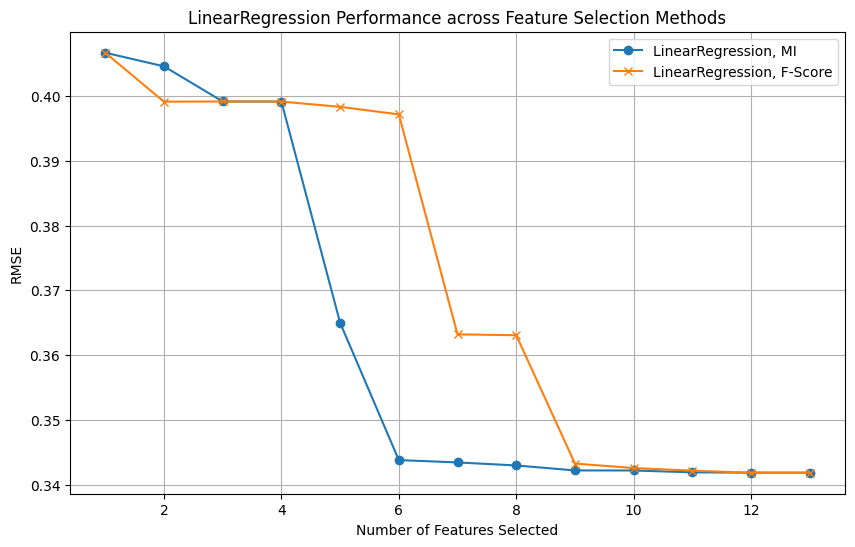

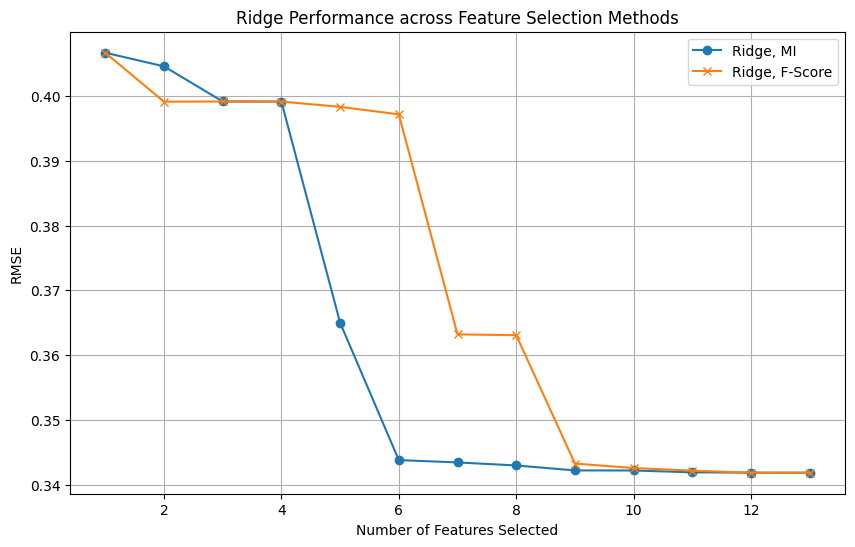

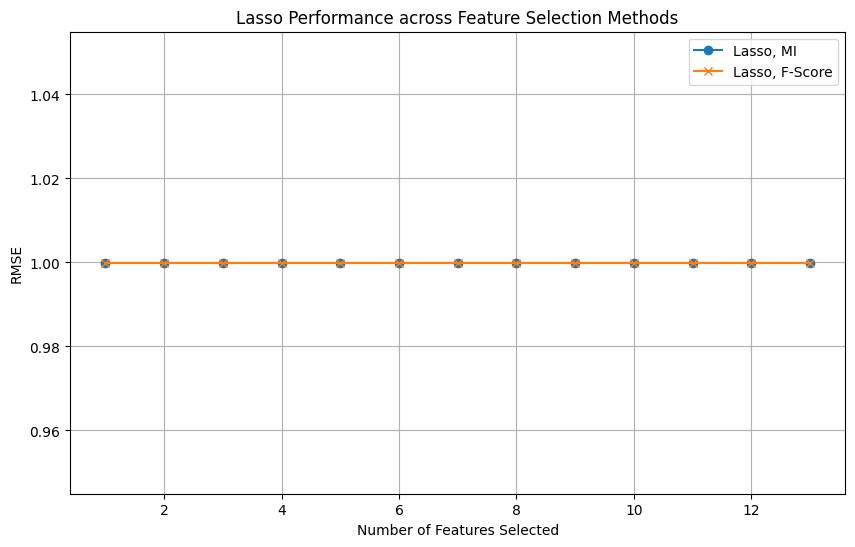

In [ ]:
def plot_model_results(model_name, results, k_values):
    plt.figure(figsize=(10, 6))

    # Plotting Mutual Information (MI) scores
    mi_scores = results[model_name]["MI"]
    plt.plot(k_values, mi_scores, '-o', label=f'{model_name}, MI')

    # Plotting F-scores
    f_scores = results[model_name]["F"]
    plt.plot(k_values, f_scores, '-x', label=f'{model_name}, F-Score')

    plt.title(f'{model_name} Performance across Feature Selection Methods')
    plt.xlabel('Number of Features Selected')
    plt.ylabel('RMSE')
    plt.legend()
    plt.grid(True)
    plt.show()

# Assuming 'results' is correctly filled with your previous code
# Adjust 'k_values' based on the actual number of feature selections you made
k_values_linear = list(range(1, len(results['LinearRegression']['MI']) + 1))

k_values_ridge = list(range(1, len(results['Ridge']['MI']) + 1))
k_values_lasso = list(range(1, len(results['Lasso']['MI']) + 1))
# Corrected function calls with the right model keys
plot_model_results('LinearRegression', results, k_values_linear)

plot_model_results('Ridge', results, k_values_ridge)
plot_model_results('Lasso', results, k_values_lasso)

The objective function
1. Ordinary Least Square : min||Y − Xβ||^2
2. Lasso : min||Y − Xβ||^2+ λ||β||1
3. Ridge : min||Y − Xβ||^2+ λ||β||2

# Question 4.1


1. Lasso Regression (L1 Regularization)
The parameter λ controls the strength of the regularization. A larger
λ leads to more coefficients being set to zero, increasing sparsity but potentially underfitting the data. Lasso tends to favor a solution with fewer nonzero coefficients, making it particularly useful when we believe many features are irrelevant or when we desire a model with simpler interpretation.
2. Ridge Regression (L2 Regularization)
The regularization strength λ balances between fitting the training data well  and reducing the magnitude of coefficients A larger λ results in greater shrinkage, leading to lower variance but potentially higher bias.
Ridge is particularly useful when dealing with multicollinearity or when the number of parameters exceeds the number of observations.
3. L2 regularization term serves for shrinkage purpose while L1 can be used for feature selection or screening purposes.

# Question 4.2

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.metrics import mean_squared_error
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

alphas = np.logspace(-6, 6, 13)

lasso_cv = LassoCV(alphas=alphas, cv=5, random_state=42).fit(X_train_scaled, y_train)
ridge_cv = RidgeCV(alphas=alphas, scoring='neg_mean_squared_error', cv=5).fit(X_train_scaled, y_train)

lasso_pred = lasso_cv.predict(X_test_scaled)
ridge_pred = ridge_cv.predict(X_test_scaled)
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_pred))
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_pred))

print(f"Lasso Best Alpha: {lasso_cv.alpha_}, RMSE: {lasso_rmse}")
print(f"Ridge Best Alpha: {ridge_cv.alpha_}, RMSE: {ridge_rmse}")
if lasso_rmse < ridge_rmse:
    print("Lasso Regression is the best model.")
    best_model = 'Lasso'
    best_alpha = lasso_cv.alpha_
else:
    print("Ridge Regression is the best model.")
    best_model = 'Ridge'
    best_alpha = ridge_cv.alpha_

print(f"Best Regularization Scheme: {best_model}, Optimal Penalty Parameter: {best_alpha}")

Lasso Best Alpha: 9.999999999999999e-06, RMSE: 0.3406201812319662
Ridge Best Alpha: 1.0, RMSE: 0.3406200781737286
Ridge Regression is the best model.
Best Regularization Scheme: Ridge, Optimal Penalty Parameter: 1.0


After finding the best alpha for each model, predictions are made on the test set. The Root Mean Squared Error (RMSE) is calculated for each model to assess their performance on unseen data. The RMSE is a common metric for regression tasks, providing an estimate of the standard deviation of the prediction errors.The model Ridge with the lower RMSE on the test set is considered the best model.

# Question 4.3

For Ridge regularization,feature standardization often plays a significant role in improving model performance to ensure that the regularization is applied uniformly across all features, thus improving the model's performance and interpretability.

In [ ]:
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.feature_selection import SelectKBest, mutual_info_regression, f_regression
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Ridge": Ridge()
}

results = {
    "Non-Standardized": {model_name: {"MI": [], "F": []} for model_name in models}
}


# Function to evaluate models
def evaluate_models(data_variant, X_train, X_test, y_train, y_test, models, results):
    print(f"Evaluating models for {data_variant} data...")
    for i in range(1, X_train.shape[1] + 1):
        print(f"\nSelecting top {i} features...")

        # Feature selection using mutual information
        selector_mi = SelectKBest(score_func=mutual_info_regression, k=i)
        X_train_mi = selector_mi.fit_transform(X_train, y_train)
        X_test_mi = selector_mi.transform(X_test)
        print(f"Selected features with MI: {selector_mi.get_support(indices=True)}")

        # Feature selection using F-score
        selector_f = SelectKBest(score_func=f_regression, k=i)
        X_train_f = selector_f.fit_transform(X_train, y_train)
        X_test_f = selector_f.transform(X_test)
        print(f"Selected features with F-score: {selector_f.get_support(indices=True)}")

        for name, model in models.items():
            print(f"\nEvaluating {name} model with MI-selected features...")
            cv_results_mi = cross_validate(model, X_train_mi, y_train, scoring='neg_root_mean_squared_error', cv=10, n_jobs=-1)
            mean_rmse_mi = -cv_results_mi['test_score'].mean()
            print(f"Mean RMSE (MI): {mean_rmse_mi}")

            print(f"Evaluating {name} model with F-selected features...")
            cv_results_f = cross_validate(model, X_train_f, y_train, scoring='neg_root_mean_squared_error', cv=10, n_jobs=-1)
            mean_rmse_f = -cv_results_f['test_score'].mean()
            print(f"Mean RMSE (F): {mean_rmse_f}")

            results[data_variant][name]["MI"].append(mean_rmse_mi)
            results[data_variant][name]["F"].append(mean_rmse_f)

    return results

# Now, call evaluate_models function and observe the printed outputs for each step
results = evaluate_models("Non-Standardized", X_train, X_test, y_train, y_test, models, results)

# After evaluation, you can inspect the final results
print("\nFinal Results:")
print(results)

Evaluating models for Non-Standardized data...

Selecting top 1 features...
Selected features with MI: [0]
Selected features with F-score: [0]

Evaluating Ridge model with MI-selected features...
Mean RMSE (MI): 0.40666427988825227
Evaluating Ridge model with F-selected features...
Mean RMSE (F): 0.40666427988825227

Selecting top 2 features...
Selected features with MI: [0 4]
Selected features with F-score: [0 3]

Evaluating Ridge model with MI-selected features...
Mean RMSE (MI): 0.4045627117172515
Evaluating Ridge model with F-selected features...
Mean RMSE (F): 0.3991076690458337

Selecting top 3 features...
Selected features with MI: [0 3 4]
Selected features with F-score: [0 3 4]

Evaluating Ridge model with MI-selected features...
Mean RMSE (MI): 0.3991405600664841
Evaluating Ridge model with F-selected features...
Mean RMSE (F): 0.3991405600664841

Selecting top 4 features...
Selected features with MI: [0 3 4 5]
Selected features with F-score: [0 3 4 5]

Evaluating Ridge model 

# Question 4.4


P-values of regression analysis provide a measure of the probability that the observed data would occur if the null hypothesis were true. If the p-value for some feature is very close to 0, we will have the confidence to say
that particular feature is significant in the linear model

In [ ]:
pip install statsmodels

In [ ]:
import statsmodels.api as sm
X_with_const = sm.add_constant(X)
model = sm.OLS(y, X_with_const).fit()

model_summary = model.summary()

print(model_summary)

p_values = model.pvalues
print("P-values for each feature:")
print(p_values)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                 8.729e+04
Date:                Mon, 18 Mar 2024   Prob (F-statistic):               0.00
Time:                        02:07:34   Log-Likelihood:                -51654.
No. Observations:              149871   AIC:                         1.033e+05
Df Residuals:                  149857   BIC:                         1.035e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -7.847e-17      0

Encoding for the red-wine and white wine  Dataset and Standardization

In [ ]:
dataset_redwine = dataset1.copy(deep=True)

In [ ]:
dataset_redwine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
X_redwine = dataset_redwine.drop('quality', axis=1)  # Features
y_redwine = dataset_redwine['quality']  # Target

# Standardize features
scaler_redwine = StandardScaler()
X_redwine_standardized = scaler_redwine.fit_transform(X_redwine)

# Split the dataset into training and testing sets
X_train_redwine, X_test_redwine, y_train_redwine, y_test_redwine = train_test_split(X_redwine_standardized, y_redwine, test_size=0.2, random_state=42)

# Display the shape of the training and testing sets to confirm
(X_train_redwine.shape, X_test_redwine.shape, y_train_redwine.shape, y_test_redwine.shape)

((1279, 11), (320, 11), (1279,), (320,))

In [ ]:
from sklearn.feature_selection import mutual_info_regression, f_regression
mi_scores = mutual_info_regression(X_train_redwine, y_train_redwine)
mi_results = pd.Series(mi_scores, index=X_redwine.columns, name="MI Scores").sort_values(ascending=False)
f_scores, p_values = f_regression(X_train_redwine, y_train_redwine)
f_results = pd.DataFrame({'F Score': f_scores, 'P Value': p_values}, index=X_redwine.columns).sort_values(by="F Score", ascending=False)
mi_results, f_results.head(), mi_results.nsmallest(2)

(alcohol                 0.192499
 total sulfur dioxide    0.110696
 volatile acidity        0.108452
 density                 0.093193
 sulphates               0.089162
 citric acid             0.082005
 fixed acidity           0.069736
 free sulfur dioxide     0.026747
 chlorides               0.012182
 residual sugar          0.003836
 pH                      0.000000
 Name: MI Scores, dtype: float64,
                          F Score       P Value
 alcohol               367.395573  3.596579e-72
 volatile acidity      213.369300  8.386233e-45
 sulphates              79.855018  1.376855e-18
 citric acid            62.565621  5.543422e-15
 total sulfur dioxide   53.245305  5.155447e-13,
 pH                0.000000
 residual sugar    0.003836
 Name: MI Scores, dtype: float64)

In [ ]:
mi_scores = mutual_info_regression(X_redwine_standardized, y_redwine)

mi_scores_df = pd.DataFrame({'Feature': X_redwine.columns, 'MI Score': mi_scores})

mi_scores_df.sort_values(by='MI Score', ascending=True, inplace=True)

mi_scores_df.head(2)

,Feature,MI Score
3,residual sugar,0.013788
5,free sulfur dioxide,0.020575


Encoding for the white-wine and white wine  Dataset and Standardization

In [ ]:
dataset_whitewine = dataset2.copy(deep=True)
dataset_whitewine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
from sklearn.preprocessing import StandardScaler

# Separating features and target variable
features_whitewine = dataset_whitewine.drop('quality', axis=1)
target_whitewine = dataset_whitewine['quality']

# Standardizing the features
scaler = StandardScaler()
features_whitewine_standardized = scaler.fit_transform(features_whitewine)

# Convert the standardized features back into a DataFrame for better readability
features_whitewine_standardized_df = pd.DataFrame(features_whitewine_standardized, columns=features_whitewine.columns)

# Display the first few rows of the standardized features to verify
features_whitewine_standardized_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.172097,-0.081770,0.213280,2.821349,-0.035355,0.569932,0.744565,2.331512,-1.246921,-0.349184,-1.393152
1,-0.657501,0.215896,0.048001,-0.944765,0.147747,-1.253019,-0.149685,-0.009154,0.740029,0.001342,-0.824276
2,1.475751,0.017452,0.543838,0.100282,0.193523,-0.312141,-0.973336,0.358665,0.475102,-0.436816,-0.336667
3,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203
4,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203


In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing sets
X_train_whitewine, X_test_whitewine, Y_train_whitewine, Y_test_whitewine = train_test_split(features_whitewine_standardized, target_whitewine, test_size=0.2, random_state=42)

# Output the shape of each set to verify the split
X_train_whitewine.shape, X_test_whitewine.shape, Y_train_whitewine.shape, Y_test_whitewine.shape

((3918, 11), (980, 11), (3918,), (980,))

In [ ]:
from sklearn.feature_selection import mutual_info_regression, f_regression

# Compute Mutual Information between each feature and the target
mi_scores = mutual_info_regression(X_train_whitewine, Y_train_whitewine)
mi_results = pd.Series(mi_scores, index=features_whitewine.columns, name="MI Scores").sort_values(ascending=False)

# Compute F-scores and p-values for each feature
f_scores, p_values = f_regression(X_train_whitewine, Y_train_whitewine)
f_results = pd.DataFrame({'F Score': f_scores, 'P Value': p_values}, index=features_whitewine.columns).sort_values(by="F Score", ascending=False)

# Display the Mutual Information scores and F-scores for comparison
mi_results, f_results.head(), mi_results.nsmallest(2)



(density                 0.194253
 alcohol                 0.153155
 residual sugar          0.099122
 total sulfur dioxide    0.090711
 chlorides               0.071327
 volatile acidity        0.066893
 free sulfur dioxide     0.047704
 citric acid             0.045638
 fixed acidity           0.031136
 sulphates               0.022064
 pH                      0.021452
 Name: MI Scores, dtype: float64,
                          F Score        P Value
 alcohol               896.871903  1.282903e-177
 density               388.880429   1.307999e-82
 volatile acidity      170.490487   3.585223e-38
 chlorides             161.756748   2.424743e-36
 total sulfur dioxide  106.233764   1.347675e-24,
 pH           0.021452
 sulphates    0.022064
 Name: MI Scores, dtype: float64)

In [ ]:
mi_scores = mutual_info_regression(features_whitewine_standardized, target_whitewine)

mi_scores_df = pd.DataFrame({'Feature': features_whitewine.columns, 'MI Score': mi_scores})

mi_scores_df.sort_values(by='MI Score', ascending=True, inplace=True)

mi_scores_df.head(2)

,Feature,MI Score
9,sulphates,0.019798
0,fixed acidity,0.025912


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error
import numpy as np

# Split the data into training and testing sets (80% train, 20% test)
X_train_whitewine, X_test_whitewine, y_train_whitewine, y_test_whitewine = train_test_split(features_whitewine_standardized, target_whitewine, test_size=0.2, random_state=42)

# Initialize the models
ols = LinearRegression()
lasso = Lasso(random_state=42)
ridge = Ridge(random_state=42)

# Train the models
ols.fit(X_train_whitewine, y_train_whitewine)
lasso.fit(X_train_whitewine, y_train_whitewine)
ridge.fit(X_train_whitewine, y_train_whitewine)

# Predict on the testing set
ols_predictions = ols.predict(X_test_whitewine)
lasso_predictions = lasso.predict(X_test_whitewine)
ridge_predictions = ridge.predict(X_test_whitewine)

# Calculate RMSE for each model
ols_rmse = np.sqrt(mean_squared_error(y_test_whitewine, ols_predictions))
lasso_rmse = np.sqrt(mean_squared_error(y_test_whitewine, lasso_predictions))
ridge_rmse = np.sqrt(mean_squared_error(y_test_whitewine, ridge_predictions))

ols_rmse, lasso_rmse, ridge_rmse

(0.7543373063311435, 0.8806495608493429, 0.7543901241092188)

# Reprocessing the Diamonds Data to Prepare for Next Parts

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install scikit-optimize

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.7/107.7 kB 2.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.feature_selection import SelectKBest, mutual_info_regression, f_regression
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from tempfile import mkdtemp
from shutil import rmtree
from joblib import Memory
from sklearn.tree import plot_tree
import lightgbm as lgb
from skopt import BayesSearchCV

In [ ]:
dataset = pd.read_csv('/content/drive/Shareddrives/ECE219/Project4/diamonds_ece219.csv')
dataset.head()

,Unnamed: 0,color,clarity,carat,cut,symmetry,polish,depth_percent,table_percent,length,width,depth,girdle_min,girdle_max,price
0,0,E,VVS2,0.09,Excellent,Very Good,Very Good,62.7,59.0,2.85,2.87,1.79,M,M,200
1,1,E,VVS2,0.09,Very Good,Very Good,Very Good,61.9,59.0,2.84,2.89,1.78,STK,STK,200
2,2,E,VVS2,0.09,Excellent,Very Good,Very Good,61.1,59.0,2.88,2.90,1.77,TN,M,200
3,3,E,VVS2,0.09,Excellent,Very Good,Very Good,62.0,59.0,2.86,2.88,1.78,M,STK,200
4,4,E,VVS2,0.09,Very Good,Very Good,Excellent,64.9,58.5,2.79,2.83,1.82,STK,STK,200


In [ ]:
dataset = dataset.drop(['Unnamed: 0'], axis=1)
print(dataset['color'].unique())
print(dataset['cut'].unique())
print(dataset['clarity'].unique())
print(dataset['symmetry'].unique())
print(dataset['polish'].unique())
print(dataset['girdle_min'].unique())
print(dataset['girdle_max'].unique())

['E' 'F' 'D' 'J' 'I' 'G' 'H' 'M' 'L' 'K']
['Excellent' 'Very Good']
['VVS2' 'VVS1' 'I1' 'VS1' 'VS2' 'IF' 'SI2' 'I2' 'SI1' 'I3']
['Very Good' 'Excellent']
['Very Good' 'Excellent']
['M' 'STK' 'TN' 'TK' 'unknown' 'VTN' 'XTN' 'VTK' 'STN' 'XTK']
['M' 'STK' 'TK' 'unknown' 'TN' 'VTK' 'VTN' 'XTN' 'STN' 'XTK']


In [ ]:
color_dict = {'M': 1, 'L': 2, 'K': 3, 'J': 4, 'I': 5, 'H': 6, 'G': 7, 'F': 8,
              'E': 9, 'D': 10}
cut_dict = {'Very Good': 1, 'Excellent': 2}
symmetry_dict = {'Very Good': 1, 'Excellent': 2}
polish_dict = {'Very Good': 1, 'Excellent': 2}
#girdle_min_dict = {'unknown': np.nan, 'XTN': 1, 'VTN': 2, 'TN': 3, 'STN': 4, 'M': 5, 'STK': 6, 'TK': 7, 'VTK': 8, 'XTK': 9}
#girdle_max_dict = {'unknown': np.nan, 'XTN': 1, 'VTN': 2, 'TN': 3, 'STN': 4, 'M': 5, 'STK': 6, 'TK': 7, 'VTK': 8, 'XTK': 9}
clarity_dict = {'I3': 1, 'I2': 2, 'I1': 3, 'SI2': 4, 'SI1': 5, 'VS2': 6,
                'VS1': 7, 'VVS2': 8, 'VVS1': 9, 'IF': 10}

In [ ]:
dataset['color_encoded'] = dataset['color'].map(color_dict)
dataset['cut_encoded'] = dataset['cut'].map(cut_dict)
dataset['clarity_encoded'] = dataset['clarity'].map(clarity_dict)
dataset['symmetry_encoded'] = dataset['symmetry'].map(symmetry_dict)
dataset['polish_encoded'] = dataset['polish'].map(polish_dict)
#dataset['girdle_min_encoded'] = dataset['girdle_min'].map(girdle_min_dict)
#dataset['girdle_max_encoded'] = dataset['girdle_max'].map(girdle_max_dict)

dataset = pd.get_dummies(dataset, columns=['girdle_min', 'girdle_max'])

dataset = dataset.drop('color', axis=1)
dataset = dataset.drop('cut', axis=1)
dataset = dataset.drop('clarity', axis=1)
dataset = dataset.drop('symmetry', axis=1)
dataset = dataset.drop('polish', axis=1)
#dataset = dataset.drop('girdle_min', axis=1)
#dataset = dataset.drop('girdle_max', axis=1)

In [ ]:
dataset.head()

,carat,depth_percent,table_percent,length,width,depth,price,color_encoded,cut_encoded,clarity_encoded,...,girdle_max_M,girdle_max_STK,girdle_max_STN,girdle_max_TK,girdle_max_TN,girdle_max_VTK,girdle_max_VTN,girdle_max_XTK,girdle_max_XTN,girdle_max_unknown
0,0.09,62.7,59.0,2.85,2.87,1.79,200,9,2,8,...,1,0,0,0,0,0,0,0,0,0
1,0.09,61.9,59.0,2.84,2.89,1.78,200,9,1,8,...,0,1,0,0,0,0,0,0,0,0
2,0.09,61.1,59.0,2.88,2.90,1.77,200,9,2,8,...,1,0,0,0,0,0,0,0,0,0
3,0.09,62.0,59.0,2.86,2.88,1.78,200,9,2,8,...,0,1,0,0,0,0,0,0,0,0
4,0.09,64.9,58.5,2.79,2.83,1.82,200,9,1,8,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
print(dataset.columns)

Index(['carat', 'depth_percent', 'table_percent', 'length', 'width', 'depth',
       'price', 'color_encoded', 'cut_encoded', 'clarity_encoded',
       'symmetry_encoded', 'polish_encoded', 'girdle_min_M', 'girdle_min_STK',
       'girdle_min_STN', 'girdle_min_TK', 'girdle_min_TN', 'girdle_min_VTK',
       'girdle_min_VTN', 'girdle_min_XTK', 'girdle_min_XTN',
       'girdle_min_unknown', 'girdle_max_M', 'girdle_max_STK',
       'girdle_max_STN', 'girdle_max_TK', 'girdle_max_TN', 'girdle_max_VTK',
       'girdle_max_VTN', 'girdle_max_XTK', 'girdle_max_XTN',
       'girdle_max_unknown'],
      dtype='object')


In [ ]:
X_unscaled_all_pd = dataset.drop('price', axis=1)
X_unscaled_all = dataset.drop('price', axis=1).to_numpy()
y = dataset['price'].to_numpy()

# Standardize Feature Columns
standard_scaling = StandardScaler()
X_all = standard_scaling.fit_transform(X_unscaled_all)

In [ ]:
print(X_unscaled_all_pd.shape)
print(X_all.shape)
print(y.shape)

(149871, 31)
(149871, 31)
(149871,)


In [ ]:
selector = SelectKBest(score_func=f_regression, k=9)
X = selector.fit_transform(X_all, y)
selected_columns = selector.get_support()
selected_column_names = X_unscaled_all_pd.columns[selected_columns]
#print(selected_columns)
print("These are the selected features:")
print(list(selected_column_names))
print(X.shape)

These are the selected features:
['carat', 'table_percent', 'length', 'width', 'depth', 'color_encoded', 'symmetry_encoded', 'polish_encoded', 'girdle_min_TN']
(149871, 9)


# 5.1: Polynomial Regression on Diamonds Dataset - Salient Features

We tested out degrees 1, 2, 3, 4, 5, an 6 for polynomial regression. In addition to this, we also tried out various different regularization strengths (alpha values) for the Ridge Regression step: 10.0^(-5), 10.0^(-2), and 10.0^3. For this step, we had to limit cross validation to only 3 folds, in order to allow the Grid Search to finish in a reasonable amount of time.

After doing the Grid Search, we found the most salient features by accessing the coefficients of our trained model. The coefficients with the greatest absolute magnitude were the ones corresponding to the most salient features.

By following this process, we got the most salient features to be ***1) 'carat', 2) 'length', and 3) 'color_encoded'.*** This makes sense, because when we analyzed the dataset at the beginning, we saw that the 'carat' and 'length' features in particular had quite a high correlation with the target variable, price.


In [ ]:
degrees = [1, 2, 3, 4, 5, 6]
degrees = np.array(degrees)
alphas = [10.0**-6, 10.0**-5, 10.0**-4, 10.0**-3, 10.0**-2, 10.0**-1, 10.0**0,
          10.0**1, 10.0**2, 10.0**3, 10.0**4, 10.0**5, 10.0**6]
alphas = np.array(alphas)

In [ ]:
!ulimit -Sv unlimited

In [ ]:
pipeline = Pipeline([
    #('poly', PolynomialFeatures()),
    ('ridge', Ridge())
])

param_grid = {
    #'poly__degree': degrees,
    'ridge__alpha': alphas
}

grid_search0 = GridSearchCV(pipeline, param_grid=param_grid, cv=10,
                           scoring='neg_root_mean_squared_error', verbose=1,
                           return_train_score=True, n_jobs=-1)
grid_search0.fit(X, y)

Fitting 10 folds for each of 13 candidates, totalling 130 fits


GridSearchCV(cv=10, estimator=Pipeline(steps=[('ridge', Ridge())]), n_jobs=-1,
             param_grid={'ridge__alpha': array([1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01,
       1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06])},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=1)

In [ ]:
grid_search0.best_params_

{'ridge__alpha': 1e-06}

In [ ]:
cachedir = mkdtemp()
memory = Memory(location=cachedir, verbose=10)
pipeline = Pipeline([
    ('poly', PolynomialFeatures()),
    ('ridge', Ridge())
],
memory=memory
)

param_grid = {
    'poly__degree': degrees,
    'ridge__alpha': [10.0**-5, 10.0**-2, 10.0**3]
}

grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=3,
                           scoring='neg_root_mean_squared_error', verbose=1,
                           return_train_score=True, n_jobs=1)
grid_search.fit(X, y)
rmtree(cachedir)

Fitting 2 folds for each of 18 candidates, totalling 36 fits
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(PolynomialFeatures(degree=1), array([[-0.558517, ..., -0.308668],
       ...,
       [ 2.359604, ...,  3.239725]]), 
array([ 1284, ..., 31996]), None, message_clsname='Pipeline', message=None)
________________________________________________fit_transform_one - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(PolynomialFeatures(degree=1), array([[-1.157106, ..., -0.308668],
       ...,
       [-0.558517, ..., -0.308668]]), 
array([ 200, ..., 1284]), None, message_clsname='Pipeline', message=None)
________________________________________________fit_transform_one - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmp4ieizut7/joblib

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.636e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(PolynomialFeatures(degree=3), array([[-1.157106, ..., -0.308668],
       ...,
       [-0.558517, ..., -0.308668]]), 
array([ 200, ..., 1284]), None, message_clsname='Pipeline', message=None)
________________________________________________fit_transform_one - 0.3s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmp4ieizut7/joblib/sklearn/pipeline/_fit_transform_one/d8a67d13fcf21f7466bb8e40650e59cc
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmp4ieizut7/joblib/sklearn/pipeline/_fit_transform_one/ed69b700993cca4b02ea88014e974551
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmp4ieizut7/joblib/sklearn/pipeline/_fit_tran

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.90834e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(PolynomialFeatures(degree=4), array([[-1.157106, ..., -0.308668],
       ...,
       [-0.558517, ..., -0.308668]]), 
array([ 200, ..., 1284]), None, message_clsname='Pipeline', message=None)
________________________________________________fit_transform_one - 0.8s, 0.0min


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.56617e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmp4ieizut7/joblib/sklearn/pipeline/_fit_transform_one/85e61fb4e9de3f7c654c2fa846a095bf
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.60509e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmp4ieizut7/joblib/sklearn/pipeline/_fit_transform_one/3c0e803b9f56f4ffdd8d1a874961782b
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmp4ieizut7/joblib/sklearn/pipeline/_fit_transform_one/85e61fb4e9de3f7c654c2fa846a095bf
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmp4ieizut7/joblib/sklearn/pipeline/_fit_transform_one/3c0e803b9f56f4ffdd8d1a874961782b
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(PolynomialFeatures(degree=5), array([[-0.558517, ..., -0.308668],
       ...,
       [ 2.359604, ...,  3.239725]]), 
array([ 1284, ..., 31996]), Non

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.61895e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmp4ieizut7/joblib/sklearn/pipeline/_fit_transform_one/c3be5419299a8ee9ca6862466c0a0609
___________________________________fit_transform_one cache loaded - 1.4s, 0.0min


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.42996e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(PolynomialFeatures(degree=1), array([[-1.157106, ..., -0.308668],
       ...,
       [ 2.359604, ...,  3.239725]]), 
array([  200, ..., 31996]), None, message_clsname='Pipeline', message=None)
________________________________________________fit_transform_one - 0.0s, 0.0min


In [ ]:
params = grid_search.best_estimator_.get_params()
coefs = params['ridge'].coef_
coefs = coefs[1:]
coefs = np.array(coefs)
coefs = np.abs(coefs)
indices_of_largest = np.argsort(coefs)[-3:]
indices_of_largest = indices_of_largest[::-1]
print("Most Salient Features:")
print(list(selected_column_names[indices_of_largest]))
print("Absolute magnitudes of the coefficients for these features, respectively:")
print(coefs[indices_of_largest])

Most Salient Features:
['carat', 'length', 'color_encoded']


# 5.2: Polynomial Regression on Diamonds Dataset - Optimal Polynomial Degree

It turned out that for this data, the ***polynomial degree of 1*** combined with a regularization strength of alpha=10^(-5) gave us the best results. We found this by doing a Grid Search which created polynomial regression models using each degree, and then picking out the model that worked the best, giving us the best RMSE value.

The test RMSE of this best estimator was: 3990.240

The train RMSE of this best estimator was: 1186.806

***A very high-order polynomial implies that the model was very closely fitted to the training data.*** This means the training RMSE is a lot better, but such overfitting means worse performance on the testing data. For instance, for the training RMSE, the best model was actually degree 6 and alpha=10^(-5), which gave an RMSE of only 850.631. However, this model gave us an RMSE of 4.86914124e+10 for testing, showing that ***making the degree too high is a clear instance of overfitting, which means great performance on training data but very poor performance on testing data.***



In [ ]:
print(grid_search.best_estimator_)
print(grid_search.best_params_)
print(grid_search.best_score_)
print(grid_search.cv_results_)

{'poly__degree': 1, 'ridge__alpha': 1e-05}
{'mean_fit_time': array([7.10432529e-02, 3.55254412e-02, 3.28900814e-02, 1.89299822e-01,
       9.44397449e-02, 9.88012552e-02, 5.08386970e-01, 2.63801932e-01,
       3.61155748e-01, 1.66459429e+00, 1.08093667e+00, 1.14974976e+00,
       3.61193115e+01, 3.40912163e+01, 4.36239743e+00, 2.26480782e+02,
       2.11217645e+02, 1.91937946e+01]), 'std_fit_time': array([7.25126266e-03, 9.93609428e-04, 2.86817551e-04, 5.88822365e-03,
       3.76939774e-04, 3.96668911e-03, 4.37462330e-03, 5.87809086e-03,
       1.63304806e-02, 5.25695086e-02, 1.08761311e-01, 1.27727270e-01,
       3.07183623e-01, 5.41460276e-01, 3.77693653e-01, 1.08504891e-01,
       2.09259748e-01, 8.53215456e-02]), 'mean_score_time': array([0.0072186 , 0.00664055, 0.00614929, 0.05817068, 0.06089914,
       0.05868816, 0.21980596, 0.20971966, 0.22389185, 0.44472468,
       0.48095059, 0.46834052, 1.02065122, 0.99785244, 1.00476229,
       2.24632812, 2.2425735 , 2.20093203]), 'std_sco

# 6.1: Neural Network on Diamonds Dataset - Finding Good Hyperparameters

For the hidden layers, we tried various depths (up to 4) and different numbers of total neurons. These are the variants we tried: (10, 20, 30, 40), (10, 20, 30), (10, 20), (10,). Then, for the weight decay regularization we tried the following values: 10**-3, 10**-1, 1, 10, and 1000. For this step, we had to limit cross validation to only 3 folds, in order to allow the Grid Search to finish in a reasonable amount of time.

After running the Grid Search, we found that ***(10, 20, 30) was the best for the neural network's hidden layer sizes, and 10^(-3) was the best regularization value.***

In [ ]:

hidden_layers = [(10, 20, 30, 40), (10, 20, 30), (10, 20), (10,)]
nn_alphas = [10**-3, 10**-1, 1, 10, 1000]


cachedir = mkdtemp()
memory = Memory(location=cachedir, verbose=10)

pipeline_NN = Pipeline([
    ('NN', MLPRegressor(activation='identity'))
],
memory=memory
)

param_grid_NN = {
    'NN__hidden_layer_sizes': hidden_layers,
    'NN__alpha': nn_alphas
}

grid_search_NN = GridSearchCV(pipeline_NN, param_grid=param_grid_NN, cv=3,
                           scoring='neg_root_mean_squared_error', verbose=1,
                           return_train_score=True, n_jobs=-1)
grid_search_NN.fit(X, y)
rmtree(cachedir)

Fitting 2 folds for each of 20 candidates, totalling 40 fits


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
print(grid_search_NN.best_params_)
print(grid_search_NN.best_score_)
print(grid_search_NN.cv_results_)

{'NN__alpha': 0.001, 'NN__hidden_layer_sizes': (10, 20, 30)}
-3328.36553172615
{'mean_fit_time': array([7.10432529e-02, 3.55254412e-02, 3.28900814e-02, 1.89299822e-01,
       9.44397449e-02, 9.88012552e-02, 5.08386970e-01, 2.63801932e-01,
       3.61155748e-01, 1.66459429e+00, 1.08093667e+00, 1.14974976e+00,
       3.61193115e+01, 3.40912163e+01, 4.36239743e+00, 2.26480782e+02,
       2.11217645e+02, 1.91937946e+01]), 'std_fit_time': array([7.25126266e-03, 9.93609428e-04, 2.86817551e-04, 5.88822365e-03,
       3.76939774e-04, 3.96668911e-03, 4.37462330e-03, 5.87809086e-03,
       1.63304806e-02, 5.25695086e-02, 1.08761311e-01, 1.27727270e-01,
       3.07183623e-01, 5.41460276e-01, 3.77693653e-01, 1.08504891e-01,
       2.09259748e-01, 8.53215456e-02]), 'mean_score_time': array([0.0072186 , 0.00664055, 0.00614929, 0.05817068, 0.06089914,
       0.05868816, 0.21980596, 0.20971966, 0.22389185, 0.44472468,
       0.48095059, 0.46834052, 1.02065122, 0.99785244, 1.00476229,
       2.24632812

# 6.2: Neural Network on Diamonds Dataset - Comparing Against Linear Regression

The test RMSE of the neural network best estimator was: 3328.366

Therefore, the performance is ***BETTER*** than linear regression. This is because the Neural Network is able to capture non-linear relationships in the data much better, whereas linear regression is linear in nature, and less able to capture non-linear relationships. Thus, we can see that the fully connected neural network is the more complex model between the two, and this explains why it performs better. Still, even though linear regression is more simple, this can sometimes be an advantage because the computations are much simpler and clearer, and this can help prevent overfitting and boost speed of training.

# 6.3: Neural Network on Diamonds Dataset - Output Activation Function

For the output, we used ***none (also known as identity)*** for the activation function. The reason is because we are doing a regression task, and our target variable, price, is continuous. We don't want to distort the scale of the output, and we don't want to inappropriately constrict the output to only include a limited range of values. Therefore, we choose to not add an activation funciton at the output. We want to allow the final output to take on any value between negative infinity and positive infinity.

# 6.4: Neural Network on Diamonds Dataset - Danger of Increasing Depth

If we increase the depth of network too far, the neural network model becomes prone to overfitting. This is because with greater depth it has more parameters that need to be tuned, and if we have too many paramters it's easy for the model to adapt to the training data too closely, resulting in good performance on the training data but poor performance on the testing data. Additionally, with more parameters we add to the computational complexity, and so training and retraining will take much longer, and this complexity might add delay when making the predictions as well.

# 7.1: Random Forest on Diamonds Dataset - Hyperparameters: Performance and Regularization Effect

For the maximum number of features, we tried between 1 and 8. Then, for the number of trees we tried the following values: values between 30-150 in increments of 30. For max depth we tried values between 5-17 in increments of 2. For this step, we had to limit cross validation to only 3 folds, in order to allow the Grid Search to finish in a reasonable amount of time.

After running the Grid Search, we found that 3 was the best for the maximum number of features, 120 was the best for number of trees, and 17 was the best for max depth.

The test RMSE of the random forest best estimator was: 3035.469

Maximum ***number of features*** can improve overall performance up to a certain extent, because considering more features in a given tree allows for greater model complexity. Considering more features can help our model be more intricate by taking more data overall into account before making a decision. However, we can't increase it too much because if the model considers too many of the features it is prone to overfitting. For instance, it might end up including features that aren't as relevant to making the decisions. Also, the trees in the random forest will not be as diverse because they will all include a great proportion of the features. Instead, the model would be more generizable if the trees were more diverse, and this is achievable by making the number of features lower. Therefore, keeping this value sufficiently low allows it to have a regularization effect.

Generally, it is good to increase ***number of trees*** because having more trees in the model ensures that our final prediction is more reliable and less affected by chance. However, we don't need to increase this too much because after we surpass a certain point, our results become reliable enough and reliability doesn't improve much by increasing number of trees further. There is not much of a regularization effect generated by this hyperparameter, but we can keep it from getting too high in order to ensure it doesn't encapsulate all the little variations in the training dataset, which we don't care about.

***Max depth*** is good to increase up to a certain point because it makes the tree more complex, and so complex relationships in the data can be better accounted for. Plus, we consider more of the data and look at more of the features/values before making the final decision, and so our result is more precise. If we increase it too much though, the model could be prone to overfitting because it becomes too complex and too closely representative of the training data. Thus, we want to increase this but not too much in order to create a model that is both sufficiently complex and generalizable to unseen data. Therefore, keeping this value sufficiently low allows it to have a regularization effect.

In [ ]:
max_num_features = [i for i in range(1, 9)]
num_of_trees = [i for i in range(30, 180, 30)]
max_depth = [i for i in range(5, 18, 2)]

cachedir = mkdtemp()
memory = Memory(location=cachedir, verbose=10)

pipeline_RF = Pipeline([
    ('RF', RandomForestRegressor(oob_score=True))
],
memory=memory
)

param_grid_RF = {
    'RF__max_features': max_num_features,
    'RF__n_estimators': num_of_trees,
    'RF__max_depth': max_depth
}

grid_search_RF = GridSearchCV(pipeline_RF, param_grid=param_grid_RF, cv=3,
                           scoring='neg_root_mean_squared_error', verbose=1,
                           return_train_score=True, n_jobs=-1)
grid_search_RF.fit(X, y)
rmtree(cachedir)


Fitting 3 folds for each of 280 candidates, totalling 840 fits


In [ ]:
print(grid_search_RF.best_params_)
print(grid_search_RF.best_score_)
print(grid_search_RF.cv_results_['mean_test_score'])

# 7.2: Random Forest on Diamonds Dataset - Non-Linear Decision Boundary

Even though all we do at each layer is apply a threshold on a feature, random forests create highly non-linear decision boundaries and thus work fairly well for the regression task. For one, even though we just apply a threshold, we do this multiple times sequentially, and using many different features as well, and this alone allows us to incorporate fairly complex relationships between the features and target variable and create complex decision boundaries. In addition to this, there is a lot of randomness added to the whole process. For instance, the feature selection at each node is randomized by only allowing for a certain subset of features to be selected from. Plus, random forests create many trees and not just one, and each tree is different, and then the results are combined together at the end. Therefore, due to both the overall structure of the model as well as the significant randomness introduced amongst many different trees, highly non-linear decision boundaries can be formed.

# 7.3: Random Forest on Diamonds Dataset - Visualizing a Tree

The structure of a randomly chosen tree in the random forest model has plotted below. 'carat' is chosen as the feature for branching at the root node. This makes a lot of sense because earlier in the project we showed that 'carat' is a highly important feature in the diamonds dataset because it is closely correlated with the target variable, price. Given that 'carat' is chosen for branching at the root node, we can infer that 'carat' is generally more important than all or most of the other features. Earlier in the project, we showed that the most salient features when doing the polynomial regression were 'carat', 'lenth', and 'color', and all these features can be found at the earlier levels of the tree structure found below, emphasizing their importance.

In [ ]:
example_rf = RandomForestRegressor(max_depth=4, max_features=3, n_estimators=120)
example_rf.fit(X, y)

120


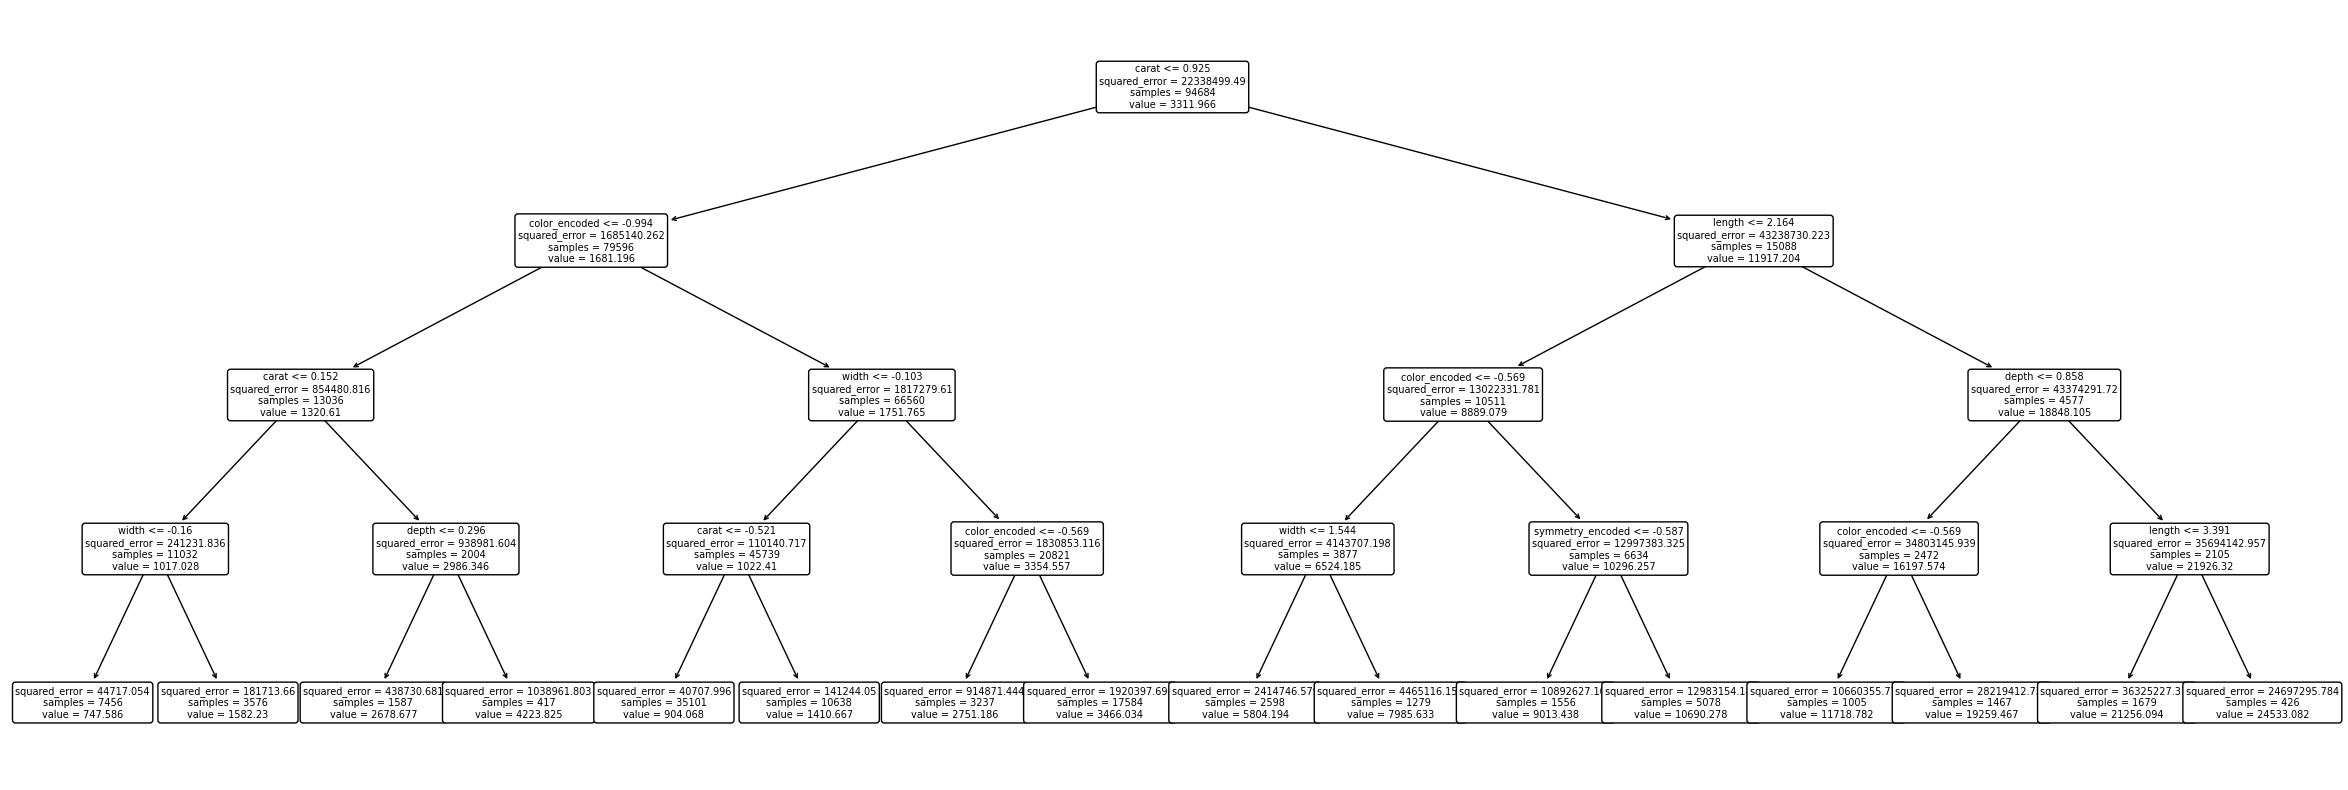

In [ ]:
example_tree = example_rf.estimators_[100]
plt.figure(figsize=(30, 10))
plot_tree(example_tree, feature_names=list(selected_column_names), filled=False, fontsize=7, rounded=True)
plt.show()

# 7.4: Random Forest on Diamonds Dataset - Out-of-Bag Error

***OOB Error is 0.062326425.***

OOB error is a metric that tells us how poorly we do when testing decision trees using data samples that they did NOT get to see when they were being trained. Essentially, measuring OOB error helps us figure out how well our random forest model generalizes for unseen data. R2 score is a measure of how well our model can explain changes in the target variable, specifically for unseen data, using the inputted features. An R2 score close to 1 indicates that the predictions of the model are fairly close to the actual values when working with unseen data. On the other hand, an R2 score that's negative or close to 0 indicates that the predictions of the model do not accurately align with the actual values when working with unseen data. In our case, since our R2 score is 0.937673575, we know our random forest model works fairly well on unseen data.

In [ ]:
best_rf = grid_search_RF.best_estimator_
print("OOB Error:", 1 - best_rf['RF'].oob_score_)

OOB Error: 0.062326425098034655


# 8.1: LightGBM on Diamonds Dataset - Important Hyperparameters and Search Space

After reading the documentation for LightGBM, we determined the important hyperparameters to be: learning_rate, n_estimators, num_leaves, max_depth, subsample, colsample_bytree, reg_alpha, and reg_lambda. The search space is displayed in the code below.

In [ ]:
lgb_model = lgb.LGBMRegressor()
search_space = {
    'learning_rate': (0.01, 0.1, 'log-uniform'),
    'n_estimators': np.arange(50, 300, 5),
    'num_leaves': np.arange(50, 1000, 100),
    'max_depth': np.arange(1, 200, 20),
    'subsample': np.arange(0.6, 1.0, 0.2),
    'subsample_freq': [1, 2, 3],
    'colsample_bytree': np.arange(0.4, 1.0, 0.2),
    'reg_alpha': [10.0**-2, 10.0**-1, 1.0, 10.0, 100.0],
    'reg_lambda': [10.0**-2, 10.0**-1, 1.0, 10.0, 100.0],
}

# 8.2: LightGBM on Diamonds Dataset - Applying Bayesian Optimization

The ideal hyperparameter combintation is: ('colsample_bytree', 0.6000000000000001), ('learning_rate', 0.1), ('max_depth', 61), ('n_estimators', 250), ('num_leaves', 450), ('reg_alpha', 1.0), ('reg_lambda', 10.0), ('subsample', 0.6), ('subsample_freq', 2) giving us an RMSE of 3924.344

In [ ]:
optimization = BayesSearchCV(
    estimator=lgb_model,
    search_spaces=search_space,
    scoring='neg_root_mean_squared_error',
    cv=2,
    n_iter=50,
    n_jobs=-1,
    verbose=1,
    return_train_score=True
)

/usr/local/lib/python3.10/dist-packages/skopt/space/space.py:110: UserWarning: Dimension array([0.6, 0.8]) was inferred to Real(low=0.6, high=0.8, prior='uniform', transform='identity'). In upcoming versions of scikit-optimize, it will be inferred to Categorical(categories=(0.6, 0.8), prior=None). See the documentation of the check_dimension function for the upcoming API.
  warnings.warn(


In [ ]:
optimization.fit(X, y)

Fitting 2 folds for each of 1 candidates, totalling 2 fits


/usr/local/lib/python3.10/dist-packages/skopt/space/space.py:110: UserWarning: Dimension array([0.6, 0.8]) was inferred to Real(low=0.6, high=0.8, prior='uniform', transform='identity'). In upcoming versions of scikit-optimize, it will be inferred to Categorical(categories=(0.6, 0.8), prior=None). See the documentation of the check_dimension function for the upcoming API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/space/space.py:110: UserWarning: Dimension array([0.6, 0.8]) was inferred to Real(low=0.6, high=0.8, prior='uniform', transform='identity'). In upcoming versions of scikit-optimize, it will be inferred to Categorical(categories=(0.6, 0.8), prior=None). See the documentation of the check_dimension function for the upcoming API.
  warnings.warn(


Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fi

BayesSearchCV(cv=2, estimator=LGBMRegressor(), n_jobs=-1,
              return_train_score=True, scoring='neg_root_mean_squared_error',
              search_spaces={'colsample_bytree': array([0.4, 0.6, 0.8]),
                             'learning_rate': (0.01, 0.1, 'log-uniform'),
                             'max_depth': array([  1,  21,  41,  61,  81, 101, 121, 141, 161, 181]),
                             'n_estimators': array([ 50,  55,  60,  65,  70,  75,  80,  85,  90,  95, 100, 105, 110,
       115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175,
       180, 185, 190, 195, 200, 205, 210, 215, 220, 225, 230, 235, 240,
       245, 250, 255, 260, 265, 270, 275, 280, 285, 290, 295]),
                             'num_leaves': array([ 50, 150, 250, 350, 450, 550, 650, 750, 850, 950]),
                             'reg_alpha': [0.01, 0.1, 1.0, 10.0, 100.0],
                             'reg_lambda': [0.01, 0.1, 1.0, 10.0, 100.0],
                             'subsample': array([0.6, 0.8]),
                             'subsample_freq': [1, 2, 3]},
              verbose=1)

In [ ]:
print(optimization.best_params_)
print(optimization.best_score_)

OrderedDict([('colsample_bytree', 0.6000000000000001), ('learning_rate', 0.1), ('max_depth', 61), ('n_estimators', 250), ('num_leaves', 450), ('reg_alpha', 1.0), ('reg_lambda', 10.0), ('subsample', 0.6), ('subsample_freq', 2)])
-3924.344586055418


# 8.3: LightGBM on Diamonds Dataset - Effect of Hyperparameters

The learning rate helps with performance by controlling the step size of gradient descent. It is also related to fitting efficiency because a smaller learning rate may take longer to train because it will take longer for convergence to occur. Number of estimators improves performance by getting rid of noise by adding more trees, each with a different structure. But we should reduce this number of estimators number if we want to improve fitting efficiency. The num leaves and max depth parameters affect performance because it determines how many leaves and layers to include in each tree, where more leaves and layers means more complexity, thus they also act as a regularization terms too because you need to make sure you don't increase it too much. Plus, if we increase these two hyperparameters too much, complexity gets so large that fitting efficiency diminishes as well. subsample and colsample_bytree relate to how much of the data to use when training and which features to use when training a particular tree. Therefore, it's important to get both to an appropriate value where they aren't incorporating too much of the training data and training features so that the model is able to generalize well. However, we want to include just enough to make performance good by adding sufficient complexity. Thus, here we see another trade off between the performance and regularization. Reg_alpha and reg_lambda both help with regularization, making sure that we don't overfit by using L1 and L2 regularization terms.